# Ejercicio

En este ejercicio se va a llevar a cabo un estudio del consumo de alcohol en estudiantes pertenecientes a distintos cursos, en concreto, a estudiantes pertenecientes a un curso de matemáticas.

Los datos de partida han sido recopilados de una encuesta a estudiantes de secundaria.

El conjunto de datos se ha obtenido de: https://www.kaggle.com/uciml/student-alcohol-consumption/home que cita como fuente del mismo a:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th Future Business TeChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran. Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it University Of Camerino

https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION

## 1. Carga de los datos
En primer lugar se procede a importar los datos y conocer que columnas hay en el csv

In [1]:
#conda install -c anaconda seaborn 

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
# Cargar el dataset
dataset_mat = pd.read_csv('student-mat.csv', sep=";")

In [52]:
# Exploracion inicial
dataset_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [53]:
# Columnas
print(dataset_mat.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


Las distintas columnas que aparecen corresponden a:

* **school** - escuela del alumno (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
* **sex** - sexo del estudiante (binaria: 'F' - female o 'M' - male)
* **age** - edad del estudiante (numerica: de 15 a 22)
* **address** - tipo de direccion del estudiante (binaria: 'U' - urban o 'R' - rural)
* **famsize** - tamaño de la familia (binaria: 'LE3' - menor o igual que 3 o 'GT3' - mayor de 3)
* **Pstatus** - estado de cohabitacion de los padres (binaria: 'T' - viviendo juntos o 'A' - separados)
* **Medu** - educación de la madre (numeric: 0 - ninguna, 1 - educación primaria (4º curso), 2 – de 5º a 9º curso, 3 – educacion secundaria o 4 – educacion superior)
* **Fedu** - educación del padre (numeric: 0 - ninguna, 1 - educación primaria (4º curso), 2 – de 5º a 9º curso, 3 – educacion secundaria o 4 – educacion superior)
* **Mjob** - trabajo de la madre (nominal: profesor: 'teacher', relacionado con la salud: 'health', servicios civiles: 'services' (p.e. administrativo or policía), amo/a de casa: 'at_home' u otro: 'other')
* **Fjob** - trabajo del padre (nominal: profesor: 'teacher', relacionado con la salud: 'health', servicios civiles: 'services' (p.e. administrativo or policía), amo/a de casa: 'at_home' u otro: 'other')
* **reason** - motivo para estudiar en esta escuela (nominal: proximidad a su casa: 'home', reputación de la escuela: 'reputation', preferencia del curso: 'course'  u otro: 'other')
* **guardian** - custodio legal del alumno (nominal: madre: 'mother', padre: 'father' u otro: 'other')
* **traveltime** - tiempo de viaje casa a la escuela (numerica: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hour, o 4 - >1 hora)
* **studytime** - tiempo semanal dedicado al estudio (numerica: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)
* **failures** - numero de suspensos previos (numerica: n si 1<=n<3, de otra forma 4)
* **schoolsup** - apoyo de formación adicional a las clases (binaria: si: yes o no: no)
* **famsup** - apoyo educacional de la familia (binaria: si: yes o no: no)
* **paid** - clases extra contratadas sobre la materia estudiada (Matemáticas) (binaria: si: yes o no: no)
* **activities** - actividades extra-curriculares (binaria: si: yes o no: no)
* **nursery** - ha asistido a la enfenrmería (binaria: si: yes o no: no)
* **higher** - si quiere cursar estudios de educación superior (binaria: si: yes o no: no)
* **internet** - acceso a Internet desde su casa (binaria: si: yes o no: no)
* **romantic** - relación sentimental (binaria: si: yes o no: no)
* **famrel** - calidad de sus relaciones familiares (numerica: De 1 - muy mala a 5 - excelente)
* **freetime** - tiempo libre tras la escuela (numerica: de 1 - muy poco a 5 - muy alto)
* **goout** - salir con amigos (numeric: De 1 - muy poco a 5 - muy alto)
* **Dalc** - consumo de alcohol durante dias laborables (numerico: de 1 - muy bajo a 5 - muy alto)
* **Walc** - consumo de alcohol en fin de semana (numerico: de 1 - muy bajo a 5 - muy alto)
* **health** - estado actual de su salud (numerica: de 1 - muy mala a 5 - muy buena)
* **absences** - numero de faltas a la escuela (numerica: de 0 a 93)
* **G1** - notas del primer semestre (numerica: de 0 a 20)
* **G2** - notas del segundo semestre (numerica: de 0 a 20)
* **G3** - nota fila (numeric: from 0 to 20, output target)

## 2. Análisis Exploratorio de Datos (EDA)

Antes de plantearse construir cualquier modelo conviene estudiar e investigar los datos para comprenderlos mejor, ver en qué se caracterizan y con ello poder hacerse preguntas sobre los mismos que puedan responderse con el uso de distintos modelos de ML. 

In [4]:
# Información relevante sobre las columnas
dataset_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

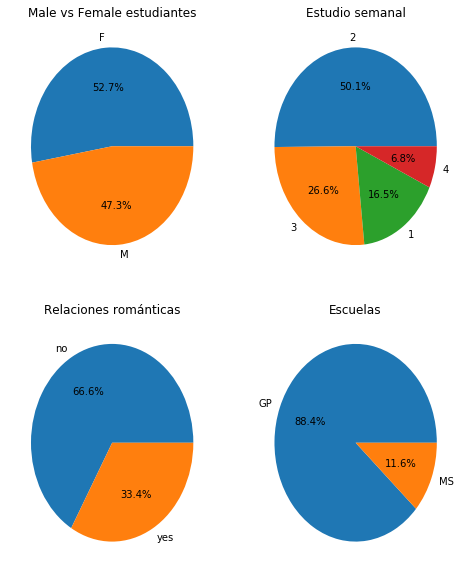

In [98]:
# Pie charts
f, ax = plt.subplots(figsize=(8, 10))

# Sexo
plt.subplot(2, 2, 1)
plt.title("Male vs Female estudiantes")
sums = dataset_mat["sex"].value_counts().tolist()
labels = dataset_mat["sex"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Weekly study time
plt.subplot(2, 2, 2)
plt.title("Estudio semanal")
sums = dataset_mat["studytime"].value_counts().tolist()
labels = dataset_mat["studytime"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Romantic relationship
plt.subplot(2, 2, 3)
plt.title("Relaciones románticas")
sums = dataset_mat["romantic"].value_counts().tolist()
labels = dataset_mat["romantic"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Escuela
plt.subplot(2, 2, 4)
plt.title("Escuelas")
sums = dataset_mat["school"].value_counts().tolist()
labels = dataset_mat["school"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


plt.show()

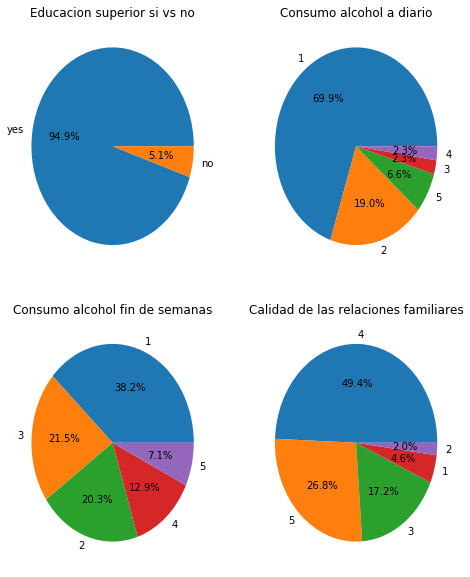

In [99]:
# Pie charts
f, ax = plt.subplots(figsize=(8, 10))


# Educacion superior
plt.subplot(2, 2, 1)
plt.title("Educacion superior si vs no")
sums = dataset_mat["higher"].value_counts().tolist()
labels = dataset_mat["higher"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Consumo alcohol a diario
plt.subplot(2, 2, 2)
plt.title("Consumo alcohol a diario")
sums = dataset_mat["Dalc"].value_counts().tolist()
labels = dataset_mat["Dalc"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Consumo alcohol fin de semanas
plt.subplot(2, 2, 3)
plt.title("Consumo alcohol fin de semanas")
sums = dataset_mat["Walc"].value_counts().tolist()
labels = dataset_mat["Walc"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Calidad relaciones familiares
plt.subplot(2, 2, 4)
plt.title("Calidad de las relaciones familiares")
sums = dataset_mat["famrel"].value_counts().tolist()
labels = dataset_mat["famrel"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


plt.show()

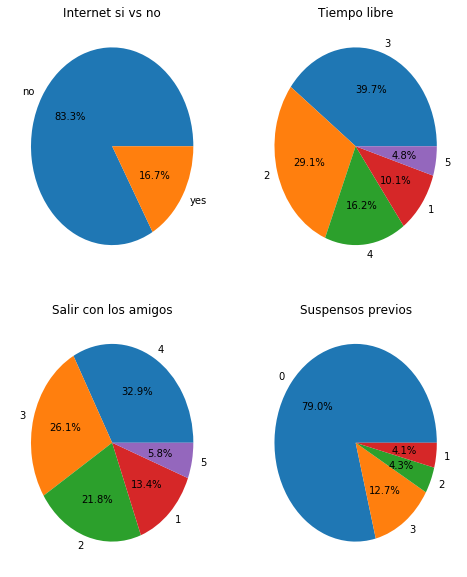

In [100]:
# Pie charts
f, ax = plt.subplots(figsize=(8, 10))


# Educacion superior
plt.subplot(2, 2, 1)
plt.title("Internet si vs no")
sums = dataset_mat["internet"].value_counts().tolist()
labels = dataset_mat["internet"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Consumo alcohol a diario
plt.subplot(2, 2, 2)
plt.title("Tiempo libre")
sums = dataset_mat["freetime"].value_counts().tolist()
labels = dataset_mat["freetime"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Consumo alcohol fin de semanas
plt.subplot(2, 2, 3)
plt.title("Salir con los amigos")
sums = dataset_mat["goout"].value_counts().tolist()
labels = dataset_mat["goout"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Calidad relaciones familiares
plt.subplot(2, 2, 4)
plt.title("Suspensos previos")
sums = dataset_mat["failures"].value_counts().tolist()
labels = dataset_mat["failures"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


plt.show()

Estas primeras visualizaciones ayudan a ver ya a priori que los datos no se distibuyen de forma homogénea sino que cada grupo de datos tiene una mayor presencia frente a los otros.

In [49]:
# Hay que transformar a numéricas las variables categóricas para poder trabajar con ellas
obj_df = dataset_mat.select_dtypes(include=['object']).copy() # se eligen las variables categoricas (object)
print(obj_df.columns)

from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

for col in obj_df.columns:
    dataset_mat[col] = lb_encoder.fit_transform(dataset_mat[col])

dataset_mat.head()

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# Ahora todas las variables son numericas
dataset_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null int64
sex           395 non-null int64
age           395 non-null int64
address       395 non-null int64
famsize       395 non-null int64
Pstatus       395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int64
Fjob          395 non-null int64
reason        395 non-null int64
guardian      395 non-null int64
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null int64
famsup        395 non-null int64
paid          395 non-null int64
activities    395 non-null int64
nursery       395 non-null int64
higher        395 non-null int64
internet      395 non-null int64
romantic      395 non-null int64
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc

In [9]:
# Ver si los datos estan completos o hay algún NaN
dataset_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
# Descripcion estadística de los datos
dataset_mat.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


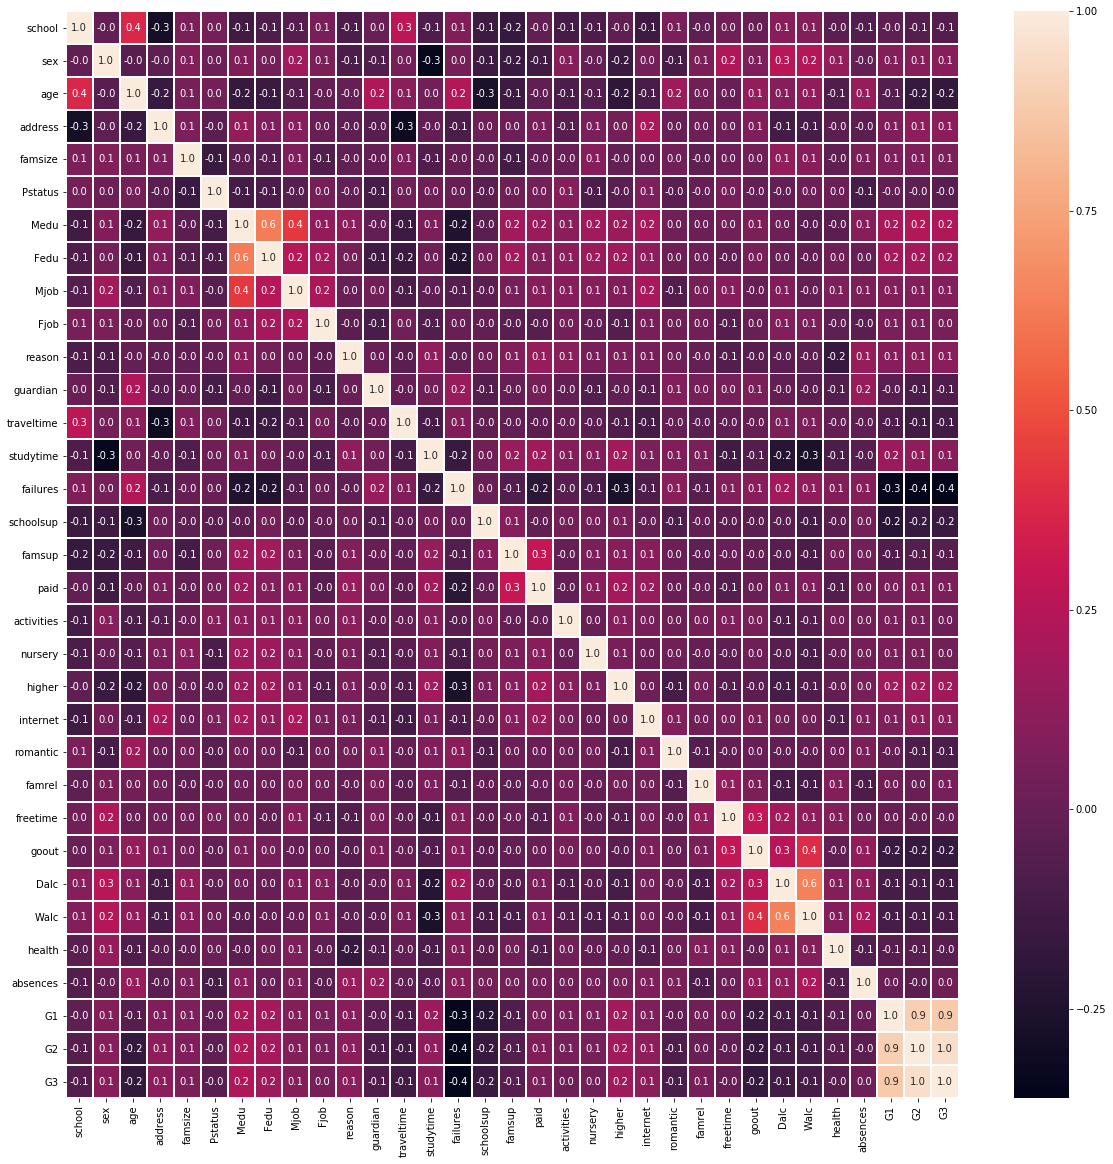

In [141]:
# Correlación entre variables
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset_mat.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

El análisis de correlaciones entre variables es un punto fundamental para entender las variables presentes en el conjunto de datos.
* Se puede apreciar como hay una alta correlación entre las variables de *notas* obtenidas, algo lógico en lo referente a G3 con G1 y G2 ya que la media final se obtiene en base a las notas de los dos semestres, por tanto son variables claramente dependientes. Es también llamativo que hay una gran correlación entre las notas de los dos semestres, de manera que lo que un estudiante saca en uno de ellos va a condicionar mucho lo que sacará en el siguiente; es decir, hay una relación de dependencia entre el rendimiento académico de los dos semestres. En cualquier caso, para una aplicación de ML sería suficiente con escoger una de las tres notas, posiblemente usar directamente la nota media G3.
* También hay relación entre la educación de la madre (Medu) y la del padre (Fedu), ya que tienen una correlación de 0.6; de esta manera parece curioso el dato de que existe una dependencia entre los estudios que han realizado los distintos cónyuges. Como la correlación es positiva podría interpretarse como que suelen darse parejas con niveles de educación similares. 
* De igual manera, hay una correlación de 0.6, y por tanto positiva, entre el consumo de alcohol a diario (Dalc) y los fines de semana (Walc). De esta manera parece que el consumir o no alcohol a diario influye en que se consuma alcohol o no el fin de semana.
* Como podría ser previsible, también hay una correlación, en este caso negativa, entre los suspensos previos (Failures) y las notas obtenidas (G1, G2 y G3), de valor -0.4. De esta manera cuantos más suspensos se hayan tenido previamente peores notas cabría esperar que se van a obtener.
* Otro par de variables con correlación negativa es el consumo de alcohol el fin de semana (Walc) con el tiempo dedicado al estudio (studytime), con valor -0.3. De esta manera parecería que los estudiantes que consumen mas alcohol en fin de semana dedican menos tiempo al estudio.
* A su vez, con correlación de 0.4, aparecen las variables de alcohol en fin de semana (Walc) y salir con los amigos (goout). De manera que los estudiantes que más salen suelen consumir más alcohol.
* El resto de variables parecen bastante independientes, llegando incluso a haber correlaciones de valor 0 (totalmente independientes)

**Nota**:
- La librería Pandas ofrece tres posibles métodos de correlación: pearson, kendall y spearman. Para trabajar con variables que no son continuas sino que son ordinales (como las categóricas convertidas a un valor numérico, en donde que el valor sea superior no quiere decir nada ya que son categorías distintas) no es bueno usar la correlación de Pearson ya que esta tiene entre sus presupuestos el que las variables sean continuas. Por este motivo se prefiere usar la correlación de Spearman aunque esta tampoco sea el mejor método para analizar relaciones entre variables categóricas-continuas o categoricas-categoricas. Aun asi es una primera aproximacion interesante a como se relacionan las variables.


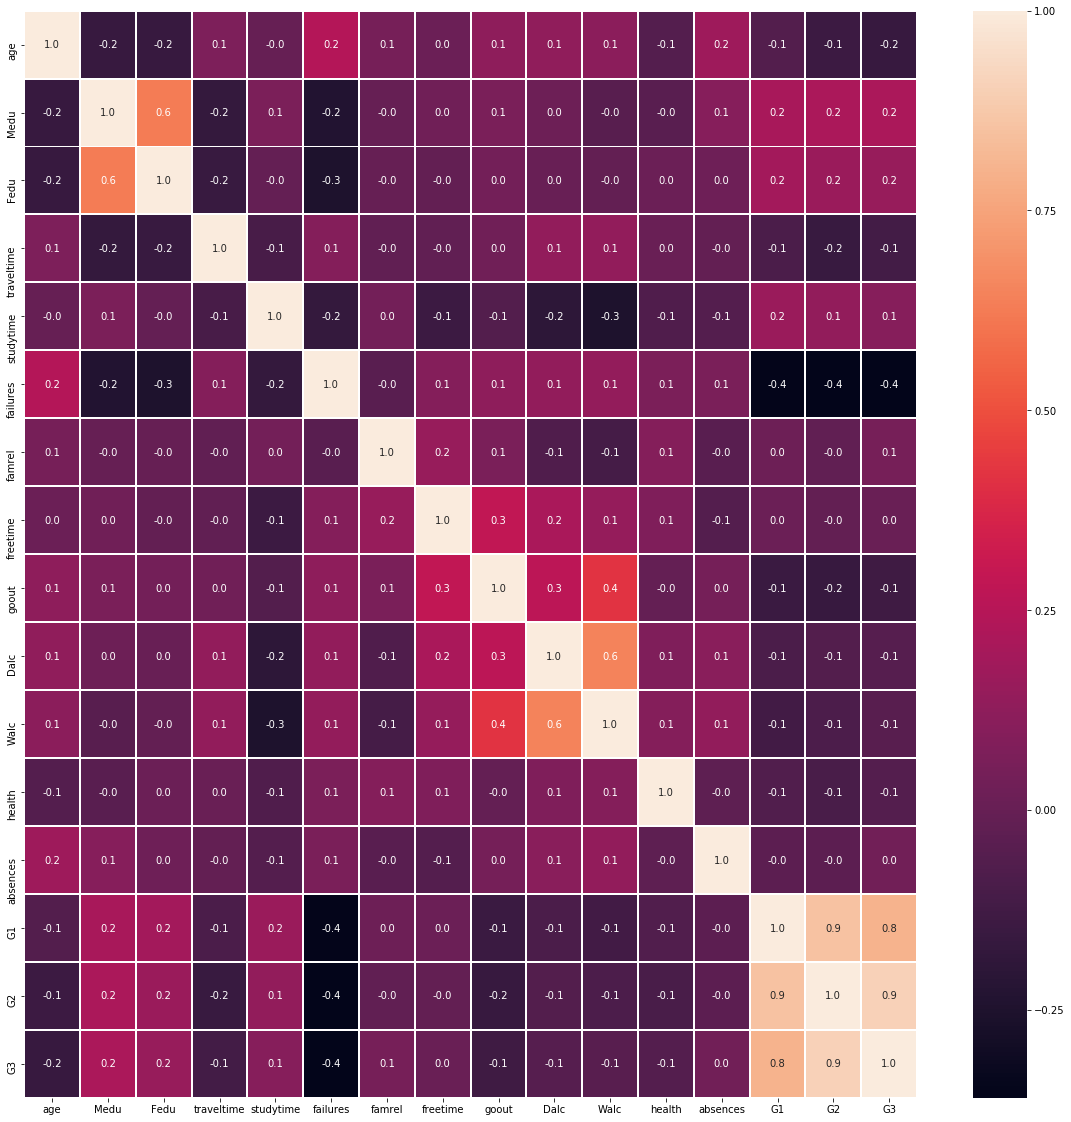

In [42]:
# Una matriz de correlaciones con Pearson
# Se cogen las variables numerales originales, sin las ordinales categoricas
cols = [x for x in list(dataset_mat.columns) if x not in list(obj_df.columns)]
f,ax = plt.subplots(figsize=(20,20))
dataset_mat_aux = dataset_mat[cols] # columnas que no esten en obj_df
sns.heatmap(dataset_mat_aux.corr(method='pearson'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

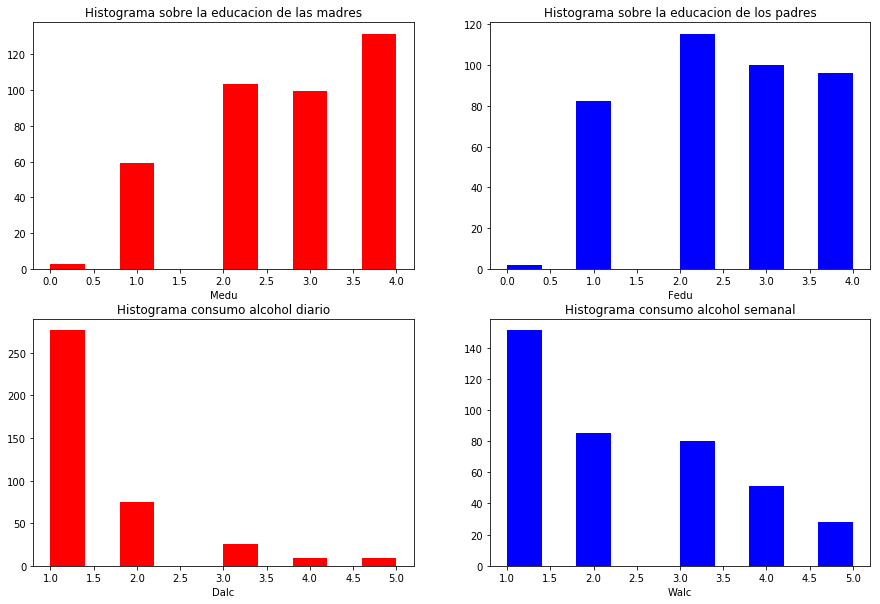

In [11]:
plt.figure(figsize=(15,10))

# Histograma educacion madres/padres
plt.subplot(2, 2, 1)
plt.hist(dataset_mat['Medu'], color = 'red')
plt.title('Histograma sobre la educacion de las madres')
plt.xlabel('Medu')


plt.subplot(2, 2, 2)
plt.hist(dataset_mat['Fedu'], color = 'blue')
plt.title('Histograma sobre la educacion de los padres')
plt.xlabel('Fedu')


# Histograma Walc/Dalc
plt.subplot(2, 2, 3)
plt.hist(dataset_mat['Dalc'], color = 'red')
plt.title('Histograma consumo alcohol diario')
plt.xlabel('Dalc')


plt.subplot(2, 2, 4)
plt.hist(dataset_mat['Walc'], color = 'blue')
plt.title('Histograma consumo alcohol semanal')
plt.xlabel('Walc')


plt.show()

En estos histogramas se puede ver como los datos pertenecientes a cada una de las clases visualizadas no tienen todos la misma importancia. De hecho se puede ver como, por ejemplo, hay muy pocos padres/madres que no tengan un nivel educativo de al menos primaria.

De igual forma se ve que la mayoría de los estudiantes no consumen alcohol ni a diario ni los fines de semana. Los que más consumen son una minoría, especialmente a diario donde lo hacen muy pocos.

Text(0.5,0,'G3')

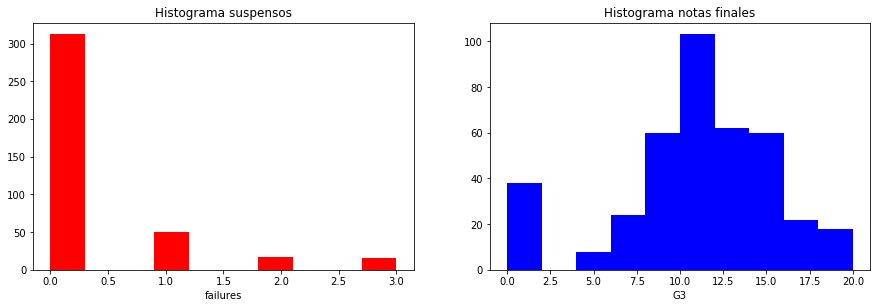

In [12]:
plt.figure(figsize=(15,10))

# Histograma G3/failures
plt.subplot(2, 2, 1)
plt.hist(dataset_mat['failures'], color = 'red')
plt.title('Histograma suspensos')
plt.xlabel('failures')

plt.subplot(2, 2, 2)
plt.hist(dataset_mat['G3'], color = 'blue')
plt.title('Histograma notas finales')
plt.xlabel('G3')

Estos histogramas son interesantes. Por un lado aparece que la mayoría de los estudiantes no tienen suspensos acumulados.
Por otro lado las notas siguen la clásica campana de Gauss (distribución normal) en la que la mayoría de las notas se concentran en base a un valor medio existiendo unos pocos casos atípicos de notas extremas (muy altas o muy bajas).

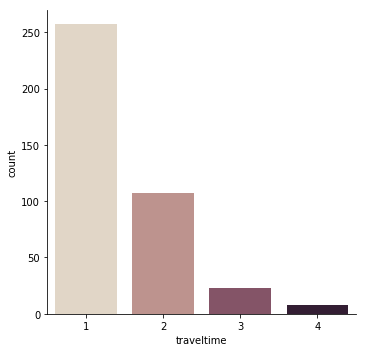

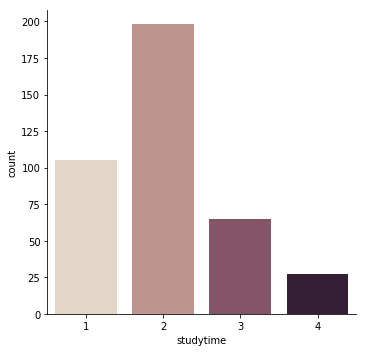

In [13]:
# Histogramas mas atractivos: Seaborn

sns.catplot(x="traveltime", kind="count", palette="ch:.25", data=dataset_mat);
sns.catplot(x="studytime", kind="count", palette="ch:.25", data=dataset_mat);

In [14]:
dataset_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

C:\Users\alber\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


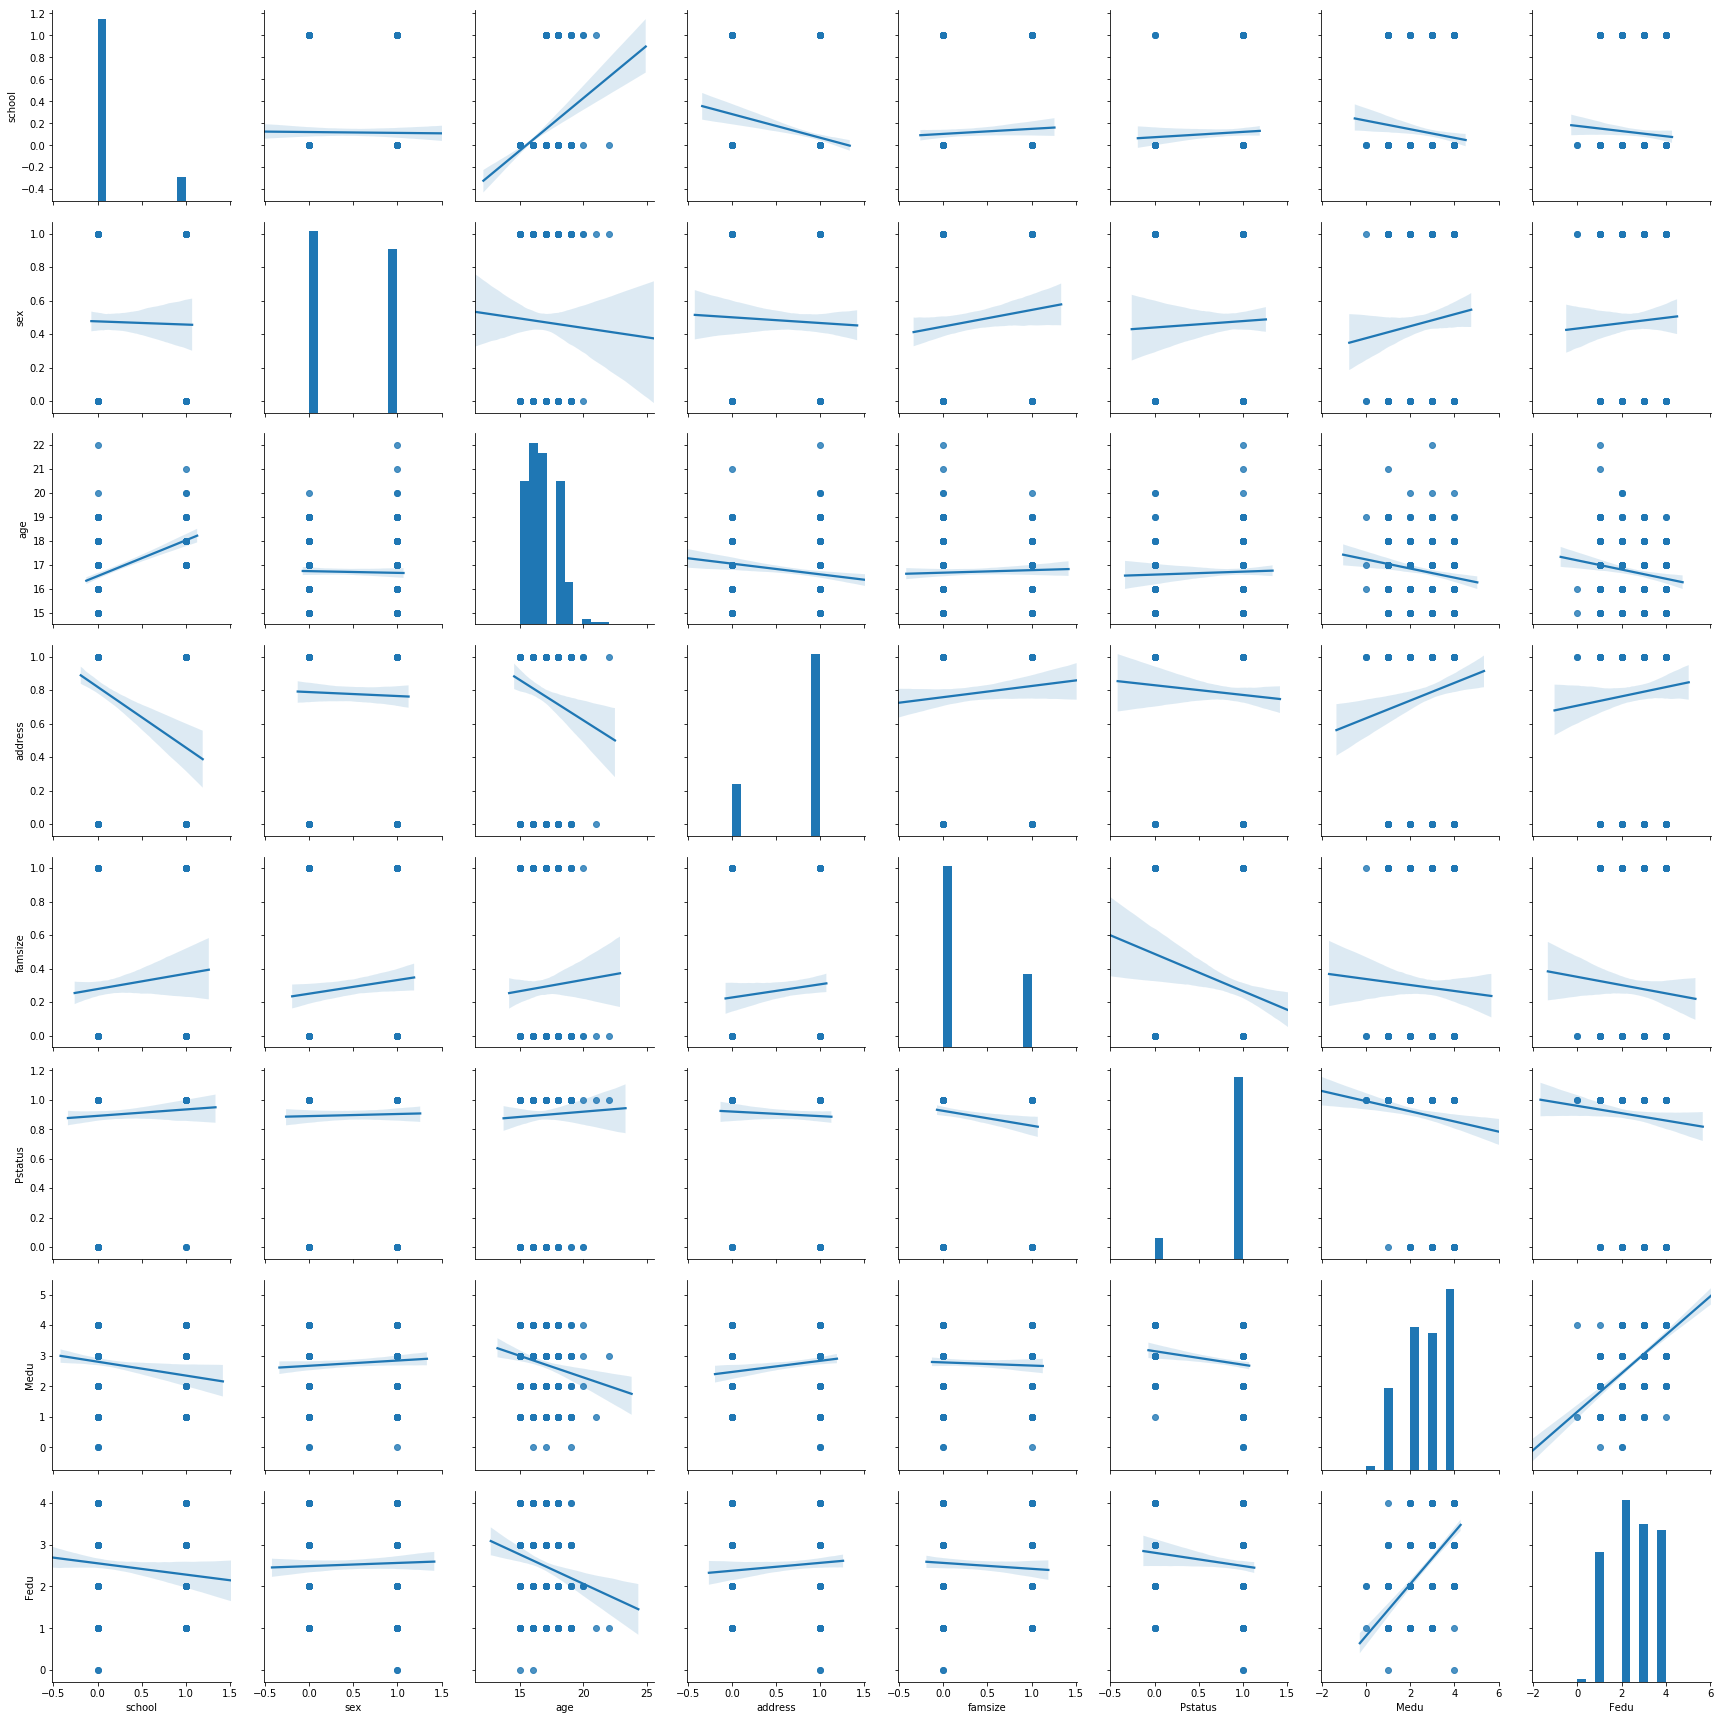

In [15]:
# Se pueden visualizar de golpe para todas las variables sus histogramas (en la diagonal) y los diagramas de disperión entre 
# cada par de variables
#sns.pairplot(dataset_mat, palette="husl",  kind="reg", height=5); # para todas ellas
cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu']
dataset_aux = dataset_mat[cols]
sns.pairplot(dataset_aux, palette="husl",  kind="reg", height=3);

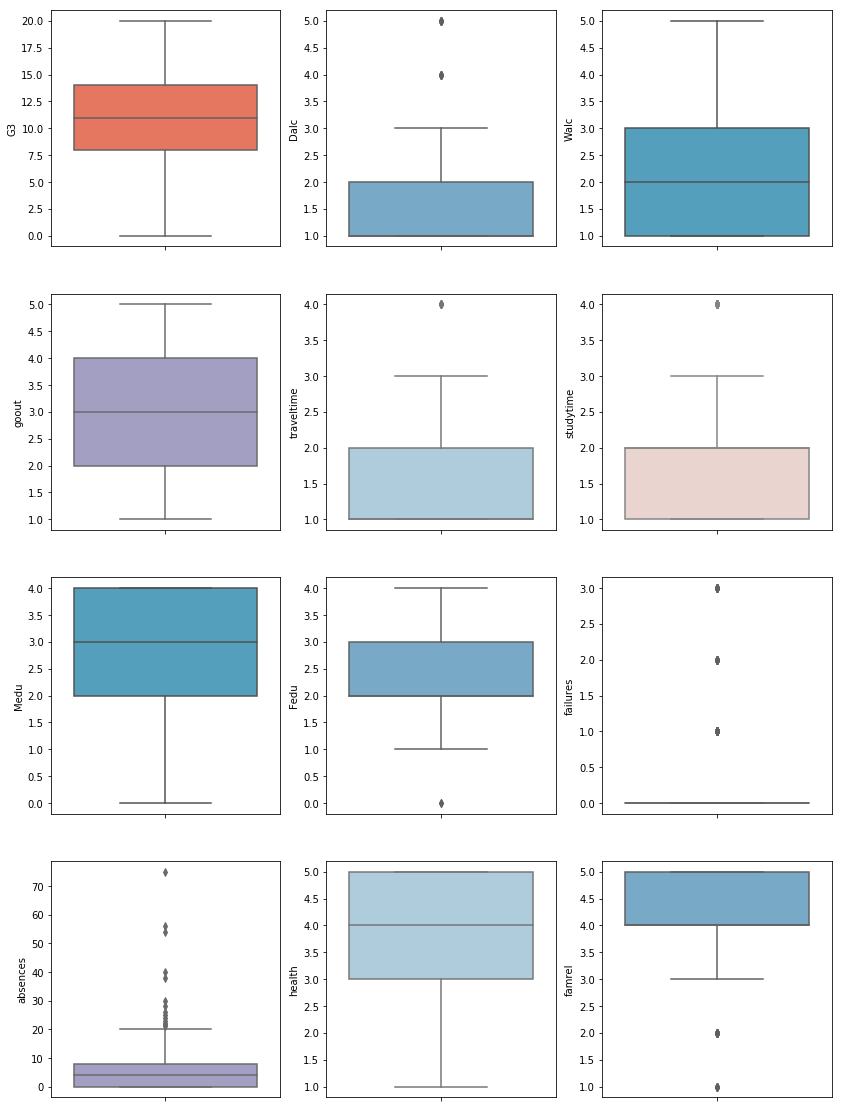

In [101]:
# Box-Plots

f, axes = plt.subplots(4, 3, figsize=(14, 20))
sns.boxplot(x= "G3", data=dataset_mat,  orient='v' , ax=axes[0][0],  palette="Reds")
sns.boxplot(x= "Dalc", data=dataset_mat,  orient='v' , ax=axes[0][1],  palette="Blues")
sns.boxplot(x= "Walc", data=dataset_mat,  orient='v' , ax=axes[0][2],  palette="GnBu_d")
sns.boxplot(x= "goout", data=dataset_mat,  orient='v' , ax=axes[1][0],  palette="Purples")
sns.boxplot(x= "traveltime", data=dataset_mat,  orient='v' , ax=axes[1][1],  palette="Paired")
sns.boxplot(x= "studytime", data=dataset_mat,  orient='v' , ax=axes[1][2],  palette=sns.cubehelix_palette(8))
sns.boxplot(x= "Medu", data=dataset_mat,  orient='v' , ax=axes[2][0],  palette="GnBu_d")
sns.boxplot(x= "Fedu", data=dataset_mat,  orient='v' , ax=axes[2][1],  palette="Blues")
sns.boxplot(x= "failures", data=dataset_mat,  orient='v' , ax=axes[2][2],  palette="Reds")
sns.boxplot(x= "absences", data=dataset_mat,  orient='v' , ax=axes[3][0],  palette="Purples")
sns.boxplot(x= "health", data=dataset_mat,  orient='v' , ax=axes[3][1],  palette="Paired")
sns.boxplot(x= "famrel", data=dataset_mat,  orient='v' , ax=axes[3][2],  palette="Blues")

En este primer caso se estudian la existencia de valores atípicos dentro de los datos en relación a ellos mismos, es decir, qué valores atípicos hay dentro de cada conjunto de datos por separado.

Se puede apreciar la existencia de ciertos valores atípicos en algunos de los boxplots utilizados; principalmennte en *famrel*, *failures*, *absences*, *Fedu*, *Dalc*, *traveltime* y *studytime*.
Es importante, de cara a los modelos que se utilicen, saber que en esas varabiables existen anomalías que pueden influir en las predicciones realizadas.

El tratamiento de anomalías puede pasar desde dejarlas como están aun teniendo presente su existencia, hasta eliminarlas (si son datos atípicos no relevantes) o imputarlas un valor arbitrario (como la media) para que no afecten al sistema en exceso. En este caso, debido a que no hay muchos datos y a que las anomalías representan información relevante de algunos estudiantes en concreto, se van a dejar como están.

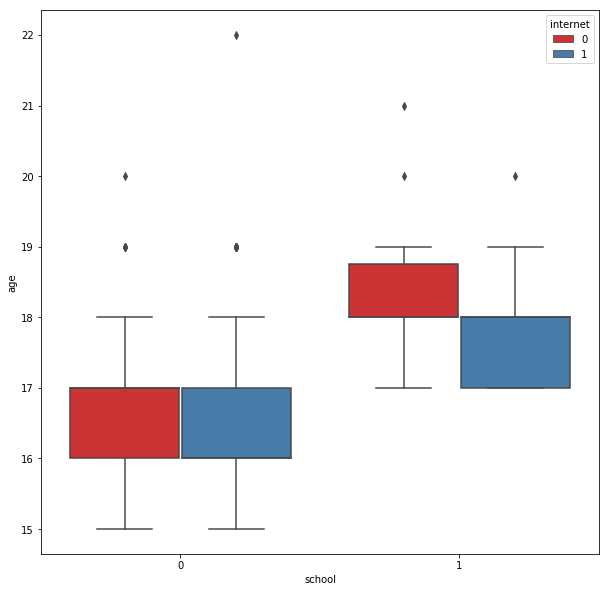

In [48]:
# Boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x="school",y="age",hue="internet",data=dataset_mat,palette="Set1")
plt.show()

# Internet
# 0: No
# 1: Yes

# Schools
# 0: GP
# 1: MS

En este caso se están analizando los valores atípicos para una distribución de datos en función de otras dos.

En este boxplot se puede ver la disponibilidad de internet en casa para los alumnos de las dos escuelas en funcion de su ead. Se puede apreciar como en la primera escuela (0=GP) la distirbucion de alumnos con y sin internet es mas equitativa existiendo algunos valores atípicos asociados a los estudiantes de más edad.
En el caso de la segunda escuela (1=GP) se aprecia como la mayor parte de los alumnos sin internet son los de mayor edad.

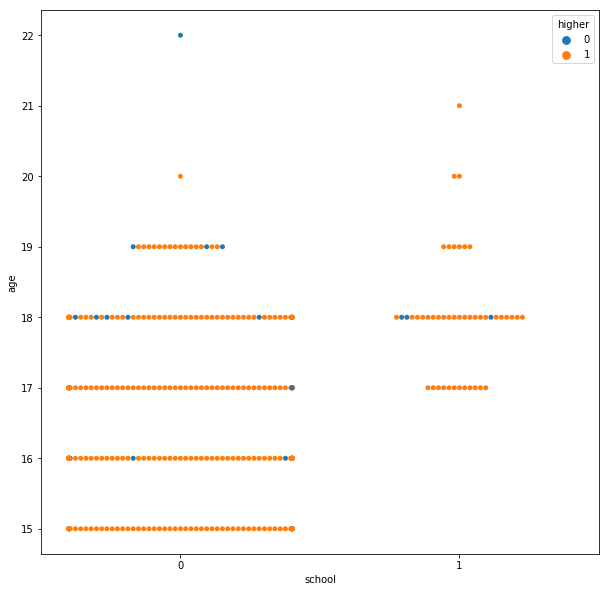

In [50]:
# Estudiantes que quieren ir a la universidad
plt.figure(figsize=(10,10))
sns.swarmplot(x="school",y="age",hue="higher",data=dataset_mat)
plt.show()

# University
# 0: No
# 1: Yes

# Schools
# 0: GP
# 1: MS

En esta gráfica se ve para cada una de las edades y cada colegio qué alumnos quieren ir a la universidad y cuales no. El dato de querer ir a la universidad (*higher*) se relaciona, segun se ha visto, con el numero de suspensos obtenidos, dato que a su vez se relaciona con las notas que se saquen, por lo que esta información es relevante. Se puede comprobar que la mayoría de los estudiantes quieren acceder a educación superior salvo algunos casos atípicos, probablemente por desmotivación; la mayoría de los estudiantes que no quieren son los mas mayores (del primer colegio) especialmente para el caso de los repetidores (edad >=18)

#### Efectos del consumo de alcohol a diario
Se puede hacer un breve estudio para comprobar cómo afecta el consumo de alcohol a diario en el rendimiento académico y qué perfil de estudiantes es el que más suele consumir.

In [19]:
import warnings
warnings.filterwarnings("ignore")

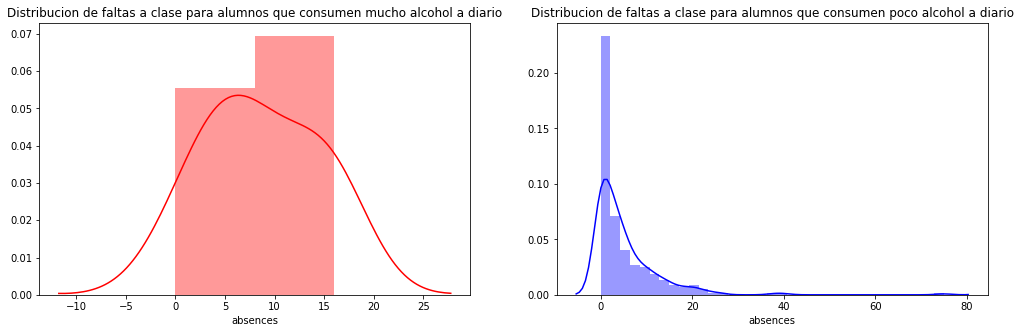

In [112]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["absences"],color='red',ax=ax)
ax.set_title('Distribucion de faltas a clase para alumnos que consumen mucho alcohol a diario')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['absences'],color='blue',ax=ax)
ax.set_title('Distribucion de faltas a clase para alumnos que consumen poco alcohol a diario')

plt.show()

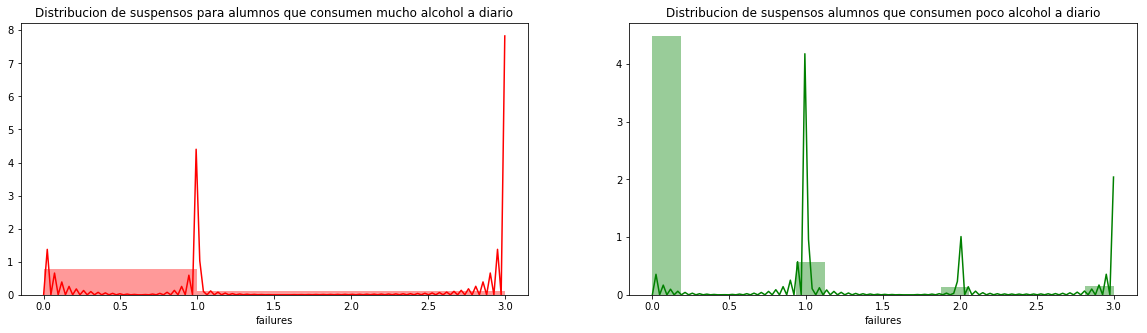

In [115]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["failures"],color='red',ax=ax)
ax.set_title('Distribucion de suspensos para alumnos que consumen mucho alcohol a diario')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['failures'],color='green',ax=ax)
ax.set_title('Distribucion de suspensos alumnos que consumen poco alcohol a diario')

plt.show()

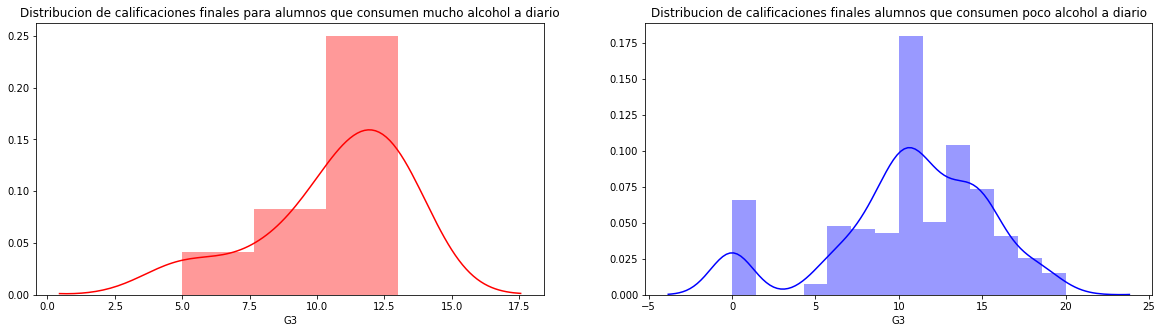

In [116]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de calificaciones finales para alumnos que consumen mucho alcohol a diario')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribucion de calificaciones finales alumnos que consumen poco alcohol a diario')

plt.show()

Se puede comprobar con estas distribuciones el efecto perjudicial de consumir alcohol los días de diario. Así, se aprecia como el número de faltas a clase aumenta, como el número de suspensos, y como la distribución de las calificaciones obtenidas es menor en comparación con los alumnos que consumen poco alcohol a diario.

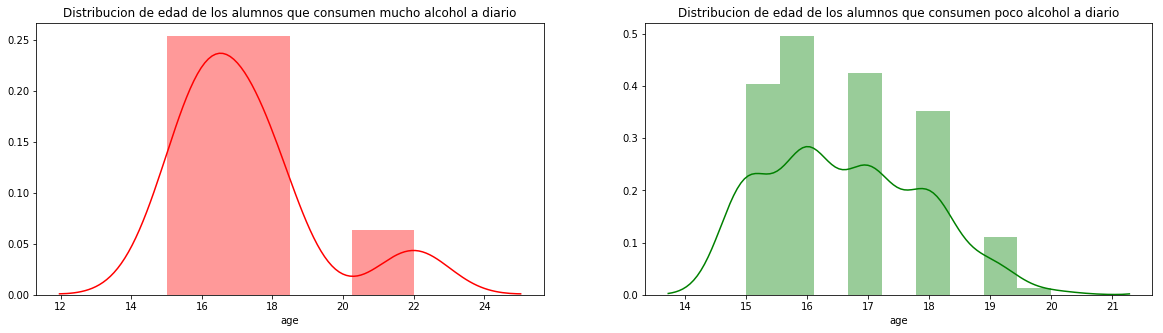

In [118]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["age"],color='red',ax=ax)
ax.set_title('Distribucion de edad de los alumnos que consumen mucho alcohol a diario')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['age'],color='green',ax=ax)
ax.set_title('Distribucion de edad de los alumnos que consumen poco alcohol a diario')

plt.show()

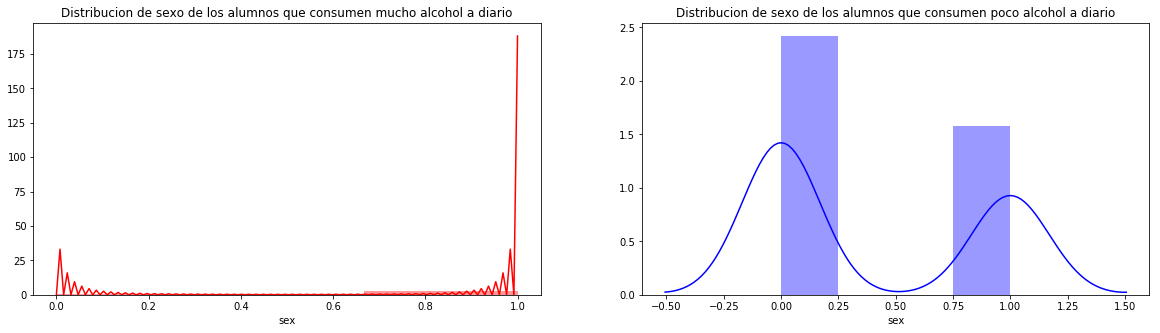

In [119]:
# Female: 0
# Male: 1

f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["sex"],color='red',ax=ax)
ax.set_title('Distribucion de sexo de los alumnos que consumen mucho alcohol a diario')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['sex'],color='blue',ax=ax)
ax.set_title('Distribucion de sexo de los alumnos que consumen poco alcohol a diario')

plt.show()

En estas otras dos gráficas se comprueba como la edad de los estudiantes que consumen alcohol a diario suele ser mayor que la de los que no lo hacen, y que los alumnos que consumen mucho alcohol a diario son en casi su totalidad hombres, mientras que entr los alumnos que consumen poco suele haber más paridad si bien es cierto que el número de mujeres es un poco más alto.

#### Influencia de las relaciones personales
Se puede extraer cierta información de las relaciones personales de los estudiantes.

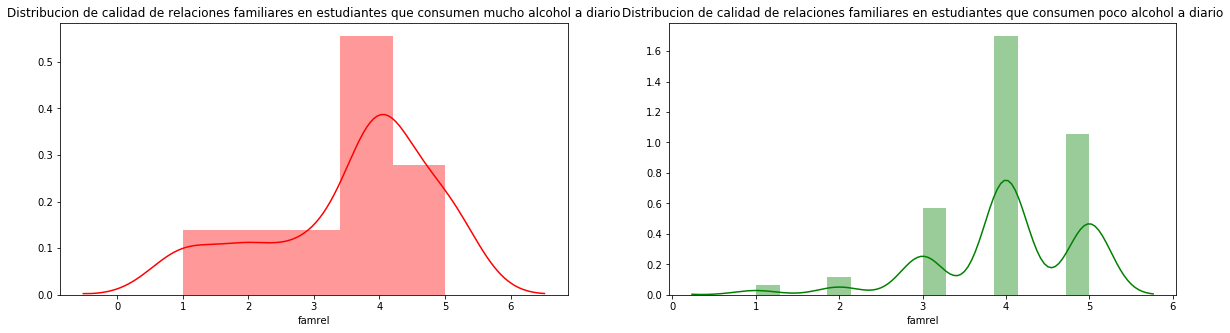

In [121]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["famrel"],color='red',ax=ax)
ax.set_title('Distribucion de calidad de relaciones familiares en estudiantes que consumen mucho alcohol a diario')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['famrel'],color='green',ax=ax)
ax.set_title('Distribucion de calidad de relaciones familiares en estudiantes que consumen poco alcohol a diario')

plt.show()

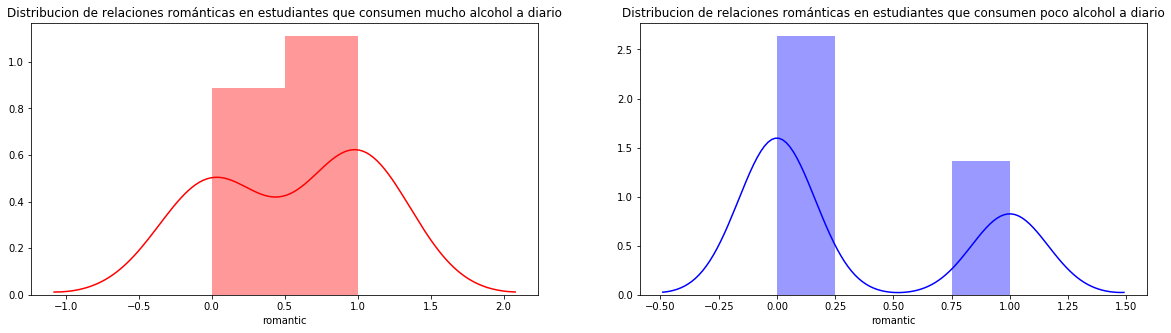

In [122]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["romantic"],color='red',ax=ax)
ax.set_title('Distribucion de relaciones románticas en estudiantes que consumen mucho alcohol a diario')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['romantic'],color='blue',ax=ax)
ax.set_title('Distribucion de relaciones románticas en estudiantes que consumen poco alcohol a diario')

plt.show()

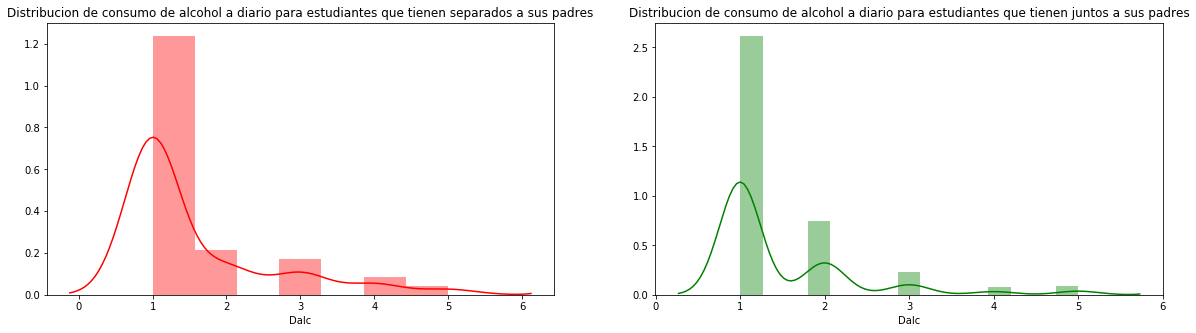

In [125]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == 0]["Dalc"],color='red',ax=ax)
ax.set_title('Distribucion de consumo de alcohol a diario para estudiantes que tienen separados a sus padres')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == 1]['Dalc'],color='green',ax=ax)
ax.set_title('Distribucion de consumo de alcohol a diario para estudiantes que tienen juntos a sus padres')

plt.show()

Por un lado parece que la calidad de las relaciones familiares no influye demasiado en el consumo de alcohol a diario (algo que ya se vio en la matriz de correlacion, ya que lo que más influye es que salgan o no fuera con los amigos). De igual forma tampoco influye demasiado que tengan o no una relación romántica, si bien varía un poco para los dos casos.
De igual forma, que los padres estén o no separados no afecta al consumo de alcohol de los estudiantes.

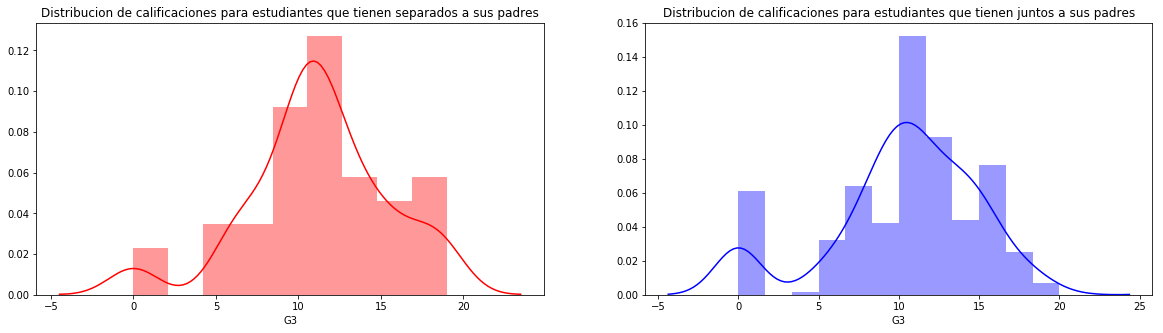

In [126]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de calificaciones para estudiantes que tienen separados a sus padres')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribucion de calificaciones para estudiantes que tienen juntos a sus padres')

plt.show()

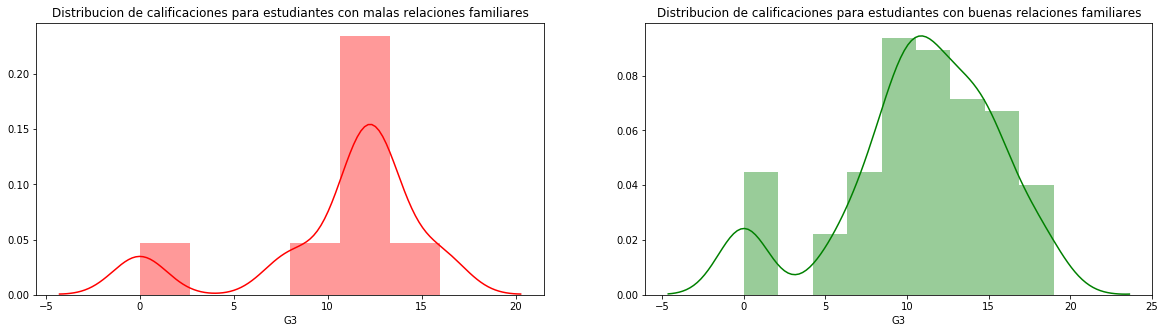

In [127]:
f= plt.figure(figsize=(20,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["famrel"] == 1]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de calificaciones para estudiantes con malas relaciones familiares')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["famrel"] == 5]['G3'],color='green',ax=ax)
ax.set_title('Distribucion de calificaciones para estudiantes con buenas relaciones familiares')

plt.show()

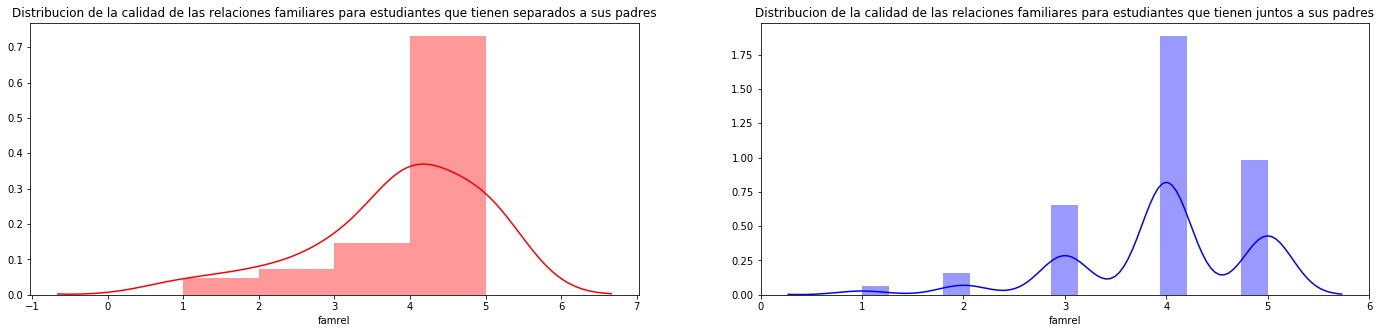

In [21]:
f= plt.figure(figsize=(24,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == 0]["famrel"],color='red',ax=ax)
ax.set_title('Distribucion de la calidad de las relaciones familiares para estudiantes que tienen separados a sus padres')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Pstatus"] == 1]['famrel'],color='blue',ax=ax)
ax.set_title('Distribucion de la calidad de las relaciones familiares para estudiantes que tienen juntos a sus padres')

plt.show()

Más llamativo es el caso de las distribuciones de notas; en el caso de que los padres estén juntos no parece haber demasiada diferencia entre las distribuciones de notas pero si que parece haberla cuando los estudiantes dicen que la calidad de sus relaciones familiares es buena. Si las relaciones familiares son buenas mejoran significativamente sus notas.
De hecho se puede comprobar que el que los padres estén o no separados no influye demasiado en cómo son las relaciones familiares.

#### ANOVA

Los análisis visuales anteriores son interesantes pero es necesario completarlos con estudios estadísticos para verificar matemáticamente (y no solo de forma visual) algunas de las conclusiones obtenidas.
Para analizar las diferencias entre varios grupos correspondientes a los valores de una categoría se usa el análisis **one-way ANOVA** donde se comprueba como los grupos de las categorías infuyen en un determinado valor numérico de salida.

In [9]:
dataset_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
import scipy.stats as stats

In [51]:
# ANOVA para ver si hay diferencias entre grupos categóricos para una variable continua concreta
# Influencia de distintas variables categóricas en las notas finales
print("Influencia del sexo en las notas")
print(stats.f_oneway(dataset_mat[dataset_mat["sex"]==0]["G3"], 
               dataset_mat[dataset_mat["sex"]==1]["G3"]))
print()

print("Influencia de tener internet notas")
print(stats.f_oneway(dataset_mat[dataset_mat["internet"]==0]["G3"], 
               dataset_mat[dataset_mat["internet"]==1]["G3"]))
print()


print("Influencia de tener relaciones románticas")
print(stats.f_oneway(dataset_mat[dataset_mat["romantic"]==0]["G3"], 
               dataset_mat[dataset_mat["romantic"]==1]["G3"]))
print()


print("Influencia de tener clases extraescolares")
print(stats.f_oneway(dataset_mat[dataset_mat["paid"]==0]["G3"], 
               dataset_mat[dataset_mat["paid"]==1]["G3"]))
print()


print("Influencia de tener actividades extraescolares")
print(stats.f_oneway(dataset_mat[dataset_mat["activities"]==0]["G3"], 
               dataset_mat[dataset_mat["activities"]==1]["G3"]))
print()


print("Influencia del apoyo familiar al estudio")
print(stats.f_oneway(dataset_mat[dataset_mat["famsup"]==0]["G3"], 
               dataset_mat[dataset_mat["famsup"]==1]["G3"]))
print()


print("Influencia de querer continuar con educacion superior")
print(stats.f_oneway(dataset_mat[dataset_mat["higher"]==0]["G3"], 
               dataset_mat[dataset_mat["higher"]==1]["G3"]))
print()


print("Influencia de la escuela")
print(stats.f_oneway(dataset_mat[dataset_mat["school"]==0]["G3"], 
               dataset_mat[dataset_mat["school"]==1]["G3"]))
print()

print("Influencia de la escuela de enfermería")
print(stats.f_oneway(dataset_mat[dataset_mat["nursery"]==0]["G3"], 
               dataset_mat[dataset_mat["nursery"]==1]["G3"]))
print()

print("Influencia de la ubicación de la vivienda")
print(stats.f_oneway(dataset_mat[dataset_mat["address"]==0]["G3"], 
               dataset_mat[dataset_mat["address"]==1]["G3"]))
print()

print("Influencia de si viven los padres o no juntos")
print(stats.f_oneway(dataset_mat[dataset_mat["Pstatus"]==0]["G3"], 
               dataset_mat[dataset_mat["Pstatus"]==1]["G3"]))
print()

print("Influencia del tamaño de la familia")
print(stats.f_oneway(dataset_mat[dataset_mat["famsize"]==0]["G3"], 
               dataset_mat[dataset_mat["famsize"]==1]["G3"]))
print()

Influencia del sexo en las notas
F_onewayResult(statistic=4.251814371189991, pvalue=0.039865332341527955)

Influencia de tener internet notas
F_onewayResult(statistic=3.8490285747156046, pvalue=0.05048021213717589)

Influencia de tener relaciones románticas
F_onewayResult(statistic=6.752697701286662, pvalue=0.009712726394119712)

Influencia de tener clases extraescolares
F_onewayResult(statistic=4.13145106484603, pvalue=0.0427650640335768)

Influencia de tener actividades extraescolares
F_onewayResult(statistic=0.10189216053999332, pvalue=0.7497402737748178)

Influencia del apoyo familiar al estudio
F_onewayResult(statistic=0.6035051787521449, pvalue=0.43771108589488095)

Influencia de querer continuar con educacion superior
F_onewayResult(statistic=13.534903449348775, pvalue=0.0002668001587281827)

Influencia de la escuela
F_onewayResult(statistic=0.7980416422082741, pvalue=0.3722262371311368)

Influencia de la escuela de enfermería
F_onewayResult(statistic=1.0478711726566379, pvalue=

En este caso interesa comprobar si el p-valor obtenido es mayor que un valor de referencia de contraste para comprobar si existen diferencias significativas en la media de valores de ambos grupos y poder así analizar si los dos grupos de datos para una variable binaria obtienen, en este caso, calificaciones significativamente diferentes:

Con un $\alpha =0.05$ y $H_{0} -> \mu_{1} = \mu{2} = ... = \mu_{n}$ 
* Si p-valor < 0.05 -> se rechaza $H_{0}$ y por tanto hay diferencias entre los grupos
* Si p-valor >= 0.05 -> no se rechaza $H_{0}$

Analizando los resultados anteriores se puede ver que los dos casos en los que más se ven las diferencias entre grupos (donde hay un p-valor menor) es en el caso de las **relaciones románticas** y de **querer continuar con educación superior** de manera que influirán sensiblemente en las calificaciones obtenidas. De igual manera, parece que el **sexo** influye también en parte (aunque es un valor muy cercano a $\alpha$). De igual forma influyen también un poco, aunque de nuevo es un valor cercano al 0.05, el tener o no clases extraescolares, así como qué escuela es a la que pertenecen o si viven en entornos rulaes o urbanos.

De nuevo, se puede analizar visualmente de la siguiente forma para estos 3 casos:

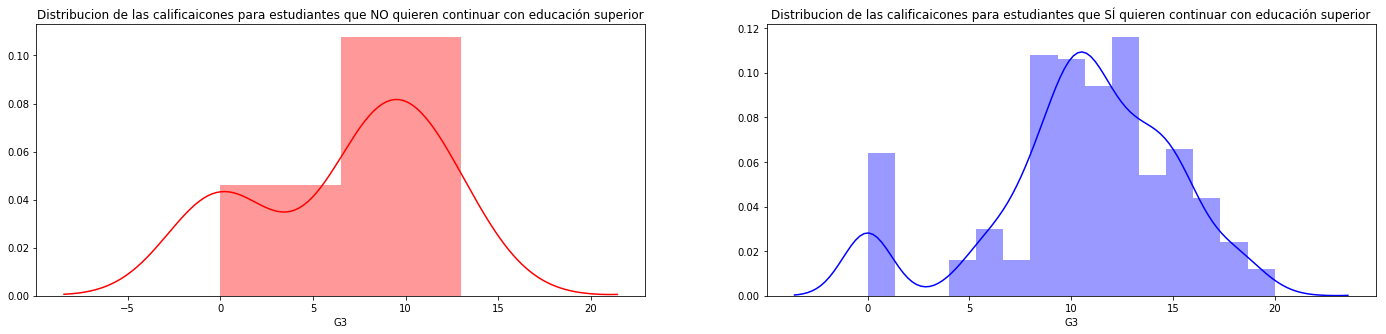

In [22]:
f= plt.figure(figsize=(24,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["higher"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaicones para estudiantes que NO quieren continuar con educación superior')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["higher"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribucion de las calificaicones para estudiantes que SÍ quieren continuar con educación superior')

plt.show()

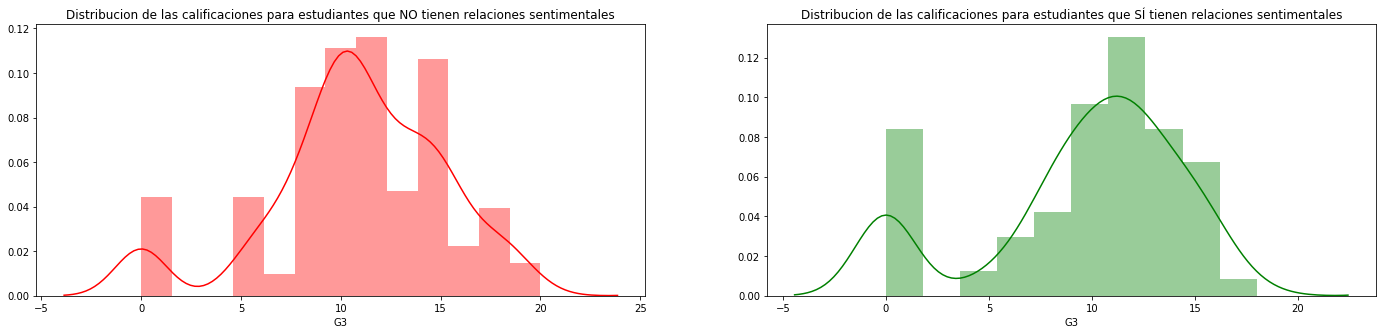

In [23]:
f= plt.figure(figsize=(24,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["romantic"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes que NO tienen relaciones sentimentales')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["romantic"] == 1]['G3'],color='green',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes que SÍ tienen relaciones sentimentales')

plt.show()

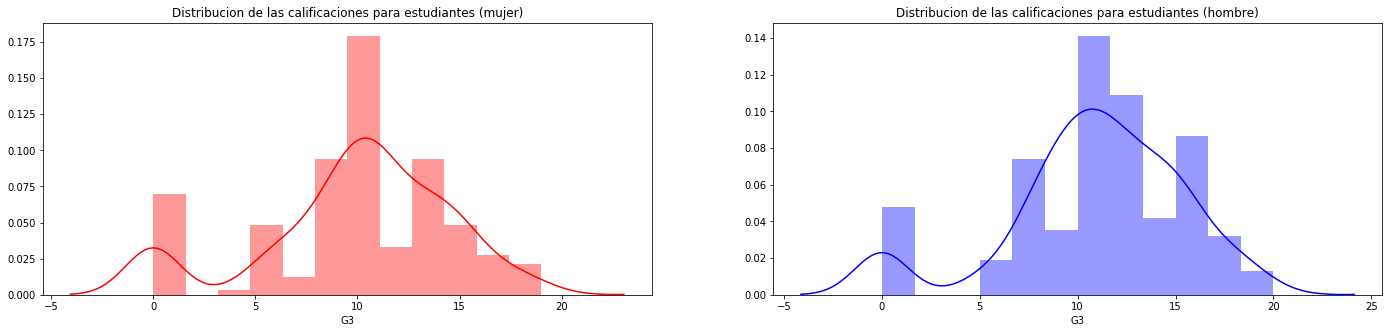

In [24]:
f= plt.figure(figsize=(24,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["sex"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes (mujer)')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["sex"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes (hombre)')

plt.show()

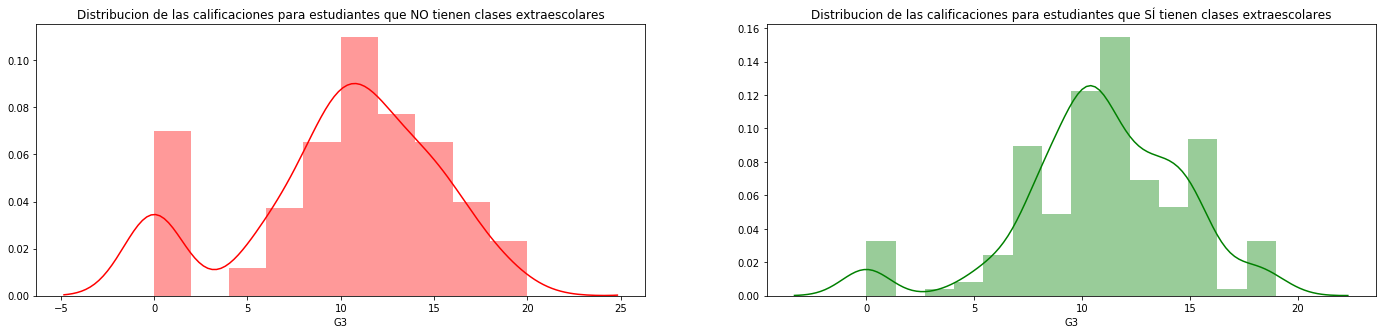

In [25]:
f= plt.figure(figsize=(24,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["paid"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes que NO tienen clases extraescolares')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["paid"] == 1]['G3'],color='green',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes que SÍ tienen clases extraescolares')

plt.show()

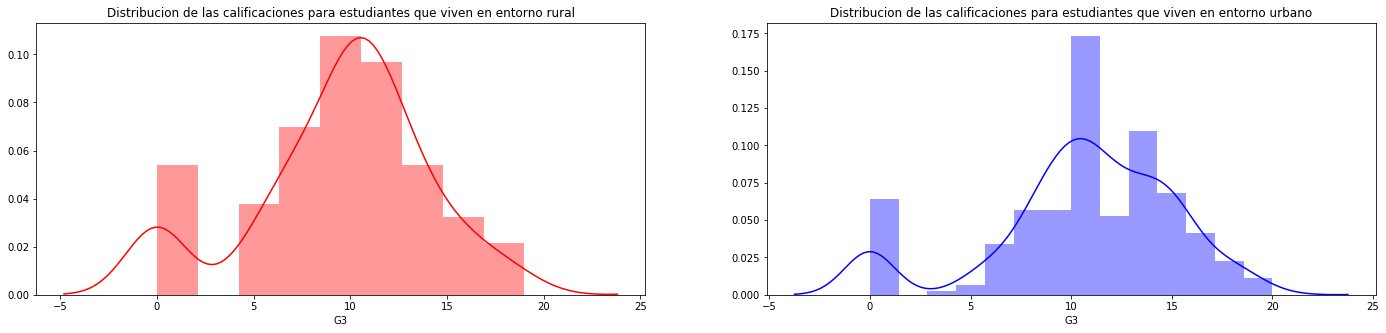

In [43]:
f= plt.figure(figsize=(24,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["address"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes que viven en entorno rural')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["address"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes que viven en entorno urbano')

plt.show()

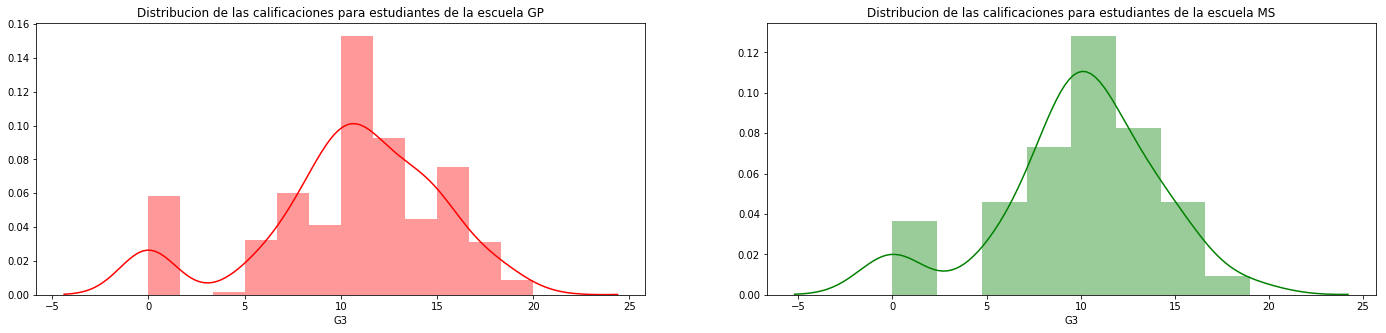

In [44]:
f= plt.figure(figsize=(24,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["school"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes de la escuela GP')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["school"] == 1]['G3'],color='green',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes de la escuela MS')

plt.show()

Para comparar cuando existen más de una categoría se pueden usar oros métodos, como el **test de Tukey** que comparen de forma automática todos los grupos dos a dos y se pueda ver cuáles de los pares de categorías son los que significativamente difieren entre sí.

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [40]:
# Influencia de la profesión de la madre en las notas
x = dataset_mat["Mjob"]
y = dataset_mat["G3"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la profesión de la madre en las notas")
print(Results)

Influencia de la profesión de la madre en las notas
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     2.9945   0.328  5.661   True 
  0      2     0.6702   -1.25  2.5903 False 
  0      3     1.8669  -0.1551 3.8888 False 
  0      4     1.8992  -0.3907 4.1891 False 
  1      2    -2.3244  -4.6905 0.0417 False 
  1      3    -1.1276  -3.5771 1.3218 False 
  1      4    -1.0953  -3.7702 1.5795 False 
  2      3     1.1967  -0.4085 2.8019 False 
  2      4     1.229   -0.7028 3.1608 False 
  3      4     0.0323  -2.0007 2.0653 False 
--------------------------------------------


In [41]:
# Influencia de la profesión del padre en las notas
x = dataset_mat["Fjob"]
y = dataset_mat["G3"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la profesión del padre en las notas")
print(Results)

Influencia de la profesión del padre en las notas
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     1.4611   -2.612 5.5342 False 
  0      2     0.0435  -2.8861 2.9732 False 
  0      3     0.1473  -2.8981 3.1927 False 
  0      4     1.8155  -1.8284 5.4594 False 
  1      2    -1.4176  -4.4926 1.6575 False 
  1      3    -1.3138  -4.4993 1.8717 False 
  1      4     0.3544  -3.4074 4.1162 False 
  2      3     0.1037  -1.3592 1.5667 False 
  2      4     1.772   -0.7067 4.2507 False 
  3      4     1.6682  -0.9463 4.2827 False 
--------------------------------------------


In [46]:
# Influencia del tutor legal en las notas
x = dataset_mat["guardian"]
y = dataset_mat["G3"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del tutor legal en las notas")
print(Results)

Influencia del tutor legal en las notas
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.2054  -1.5136 1.1028 False 
  0      2    -1.6264  -3.8416 0.5888 False 
  1      2     -1.421  -3.4321  0.59  False 
--------------------------------------------


In [47]:
# Influencia de la profesión de la madre en el consumo de alcohol diario
x = dataset_mat["Mjob"]
y = dataset_mat["Dalc"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la profesión de la madre el consumo de alcohol diario")
print(Results)

Influencia de la profesión de la madre el consumo de alcohol diario
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.1251  -0.6511 0.4008 False 
  0      2     0.1137   -0.265 0.4925 False 
  0      3     0.1344  -0.2644 0.5333 False 
  0      4     0.1791  -0.2725 0.6308 False 
  1      2     0.2388  -0.2279 0.7055 False 
  1      3     0.2596  -0.2236 0.7427 False 
  1      4     0.3043  -0.2233 0.8319 False 
  2      3     0.0207  -0.2959 0.3373 False 
  2      4     0.0654  -0.3156 0.4465 False 
  3      4     0.0447  -0.3563 0.4457 False 
--------------------------------------------


In [48]:
# Influencia de la profesión del padre en el consumo de alcohol diario
x = dataset_mat["Fjob"]
y = dataset_mat["Dalc"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la profesión del padre el consumo de alcohol diario")
print(Results)

Influencia de la profesión del padre el consumo de alcohol diario
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.0667  -0.8585 0.7252 False 
  0      2     0.0194  -0.5502 0.5889 False 
  0      3     0.2396  -0.3524 0.8317 False 
  0      4     0.0828  -0.6257 0.7912 False 
  1      2     0.086   -0.5118 0.6839 False 
  1      3     0.3063   -0.313 0.9256 False 
  1      4     0.1494  -0.5819 0.8808 False 
  2      3     0.2203  -0.0641 0.5047 False 
  2      4     0.0634  -0.4185 0.5453 False 
  3      4    -0.1569  -0.6652 0.3514 False 
--------------------------------------------


In [49]:
# Influencia del tutor legal en el consumo de alcohol diario
x = dataset_mat["guardian"]
y = dataset_mat["Dalc"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del tutor legal el consumo de alcohol diario")
print(Results)

Influencia del tutor legal el consumo de alcohol diario
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.0828  -0.3378 0.1722 False 
  0      2     0.0604  -0.3714 0.4922 False 
  1      2     0.1432  -0.2488 0.5352 False 
--------------------------------------------


Como se puede apreciar no hay influencias significativa de estos grupos, salvo en el caso de la profesión de la madre sobre las calificaciones cuando se analizan los grupos de madres que trabajan en casa frente a las que trabajan en el sector sanitario.

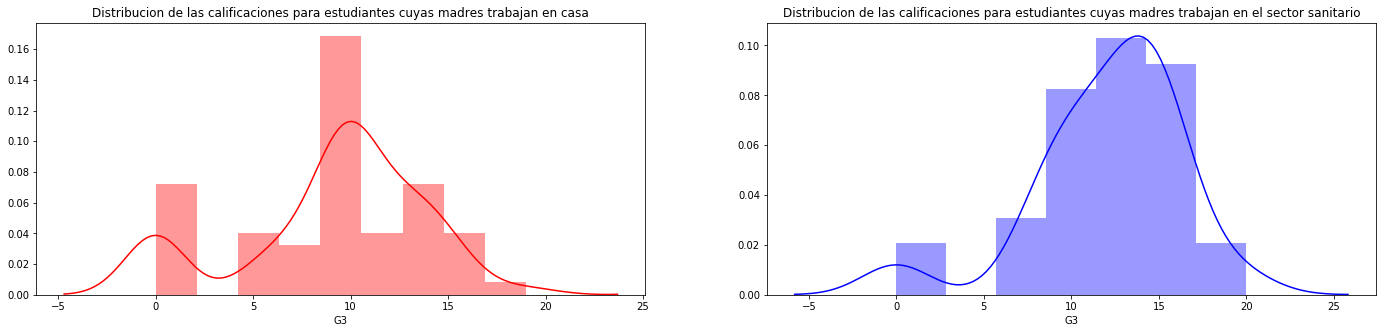

In [50]:
f= plt.figure(figsize=(24,5))

ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Mjob"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes cuyas madres trabajan en casa')

ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Mjob"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes cuyas madres trabajan en el sector sanitario')

plt.show()

## 3. Construcción de Modelos Predictivos
Una vez que se tiene ya un conocimiento de las variables presentes en el conjunto de datos, cuáles son numéricas, cuáles categóricas ordinales y cómo se relacionan entre sí y dónde hay o no correlación, se puede proceder a construir algún modelo predictivo.

La fase del EDA es necesaria también para detectar el posible valor que tendría un modelo predictivo, es decir, detectar la oportunidad de negocio. En este caso podría ser interesante para el sector educativo proponer un modelo que fuese capaz de, en función de los datos del perfil de cada estudiante, predecir qué calificaciones obtendría de manera que se pudiese detectar antes de tiempo qué estudiantes se encuentran en situación de riesgo por predecirse que obtendrán calificaciones bajas.

Si se quiere predecir la calificación final se podrían plantear dos modelos: uno que hiciese su predicción antes de comenzar el curso (es decir, que no se tuviese la calificación de ningún semestre aun) u otro que lo hiciese durante el curso cuando ya se tuviese la calificación de alguno de los semestres. Como se ha visto en el EDA las calificaciones obtenidas durante los semestres influyen enormemente en la calificación final (hay mucha correlación), por lo que daría mucho poder predictivo al modelo incluir ese dato. No obstante, en primer lugar y simulando que se quisiese poder predecir las calificaciones lo nates posible se va a trabajar sin ese conocimiento de las notas de los semestres e intentando predecir la calificación final del estudiante en función de sus datos de perfil, a los cuales se tendría acceso desde el principio del curso.

De esta forma, en base a lo que se ha ido viendo, se podrían seleccionar inicialmente como predictores las variables:
* failures
* higher
* goout
* Medu
* Fedu
* Mjob
* age
* Dalc
* Walc
* internet
* romantic
* famrel
* school
* studytime
* address

Para la variable de salida continua:
* G3

De manera que se estaría ante un problema de regresión.

In [50]:
# Dataset solo con las columnas que interesan
dataset_new = dataset_mat[["failures", "higher", "studytime", "goout", "Medu", 
                           "Fedu", "Mjob", "age", "Dalc", "internet",
                          "romantic", "famrel", "school", "address", "paid",
                          "G3"]].copy()

print(dataset_new.shape)
dataset_new.head()

(395, 16)


,failures,higher,studytime,goout,Medu,Fedu,Mjob,age,Dalc,internet,romantic,famrel,school,address,paid,G3
0,0,1,2,4,4,4,0,18,1,0,0,4,0,1,0,6
1,0,1,2,3,1,1,0,17,1,1,0,5,0,1,0,6
2,3,1,2,2,1,1,0,15,2,1,0,4,0,1,1,10
3,0,1,3,2,4,2,1,15,1,1,1,3,0,1,1,15
4,0,1,2,2,3,3,2,16,1,0,0,4,0,1,1,10


El objetivo principal será construir algunos modelos diversos y comprobar cuál ofrece mejores resultados al tiempo que generaliza mejor. De forma meramente orientativa se puede usar de referencia la guía de selección de algoritmos de scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Esta propondría para el problema con el que se está trabajando usar una **RidgeRegression** o un **SVR con kernel lineal**

Antes de nada, eso sí, hay que hacer un preprocesado de los datos

### Data Preprocessing

In [250]:
df_mat = dataset_new[["failures", "higher", "age", "Dalc", "internet", "romantic", "famrel", "school", "address", "paid", "G3"]]

# Dummy variables para las variables categoricas nominals no binarias
aux = pd.get_dummies(dataset_new["Medu"], drop_first = True)
aux.columns = [str(col)+"_Medu" for col in list(aux.columns)]
df_mat = df_mat.join(aux, how='inner')

aux = pd.get_dummies(dataset_new["Fedu"], drop_first = True)
aux.columns = [str(col)+"_Fedu" for col in list(aux.columns)]
df_mat = df_mat.join(aux, how='inner')

df_mat.head()

,failures,higher,age,Dalc,internet,romantic,famrel,school,address,paid,G3,1_Medu,2_Medu,3_Medu,4_Medu,1_Fedu,2_Fedu,3_Fedu,4_Fedu
0,0,1,18,1,0,0,4,0,1,0,6,0,0,0,1,0,0,0,1
1,0,1,17,1,1,0,5,0,1,0,6,1,0,0,0,1,0,0,0
2,3,1,15,2,1,0,4,0,1,1,10,1,0,0,0,1,0,0,0
3,0,1,15,1,1,1,3,0,1,1,15,0,0,0,1,0,1,0,0
4,0,1,16,1,0,0,4,0,1,1,10,0,0,1,0,0,0,1,0


In [251]:
# Escalado de las variables numerales ordinales
from sklearn.preprocessing import MinMaxScaler

df = dataset_mat[["age", "failures", "famrel", "Dalc"]].copy()
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Combine dataframes
df_mat["age"] = df_scaled["age"]
df_mat["failures"] = df_scaled["failures"]
df_mat["famrel"] = df_scaled["famrel"]
df_mat["Dalc"] = df_scaled["Dalc"]

del df_scaled

df_mat.head()

,failures,higher,age,Dalc,internet,romantic,famrel,school,address,paid,G3,1_Medu,2_Medu,3_Medu,4_Medu,1_Fedu,2_Fedu,3_Fedu,4_Fedu
0,0.0,1,0.428571,0.00,0,0,0.75,0,1,0,6,0,0,0,1,0,0,0,1
1,0.0,1,0.285714,0.00,1,0,1.00,0,1,0,6,1,0,0,0,1,0,0,0
2,1.0,1,0.000000,0.25,1,0,0.75,0,1,1,10,1,0,0,0,1,0,0,0
3,0.0,1,0.000000,0.00,1,1,0.50,0,1,1,15,0,0,0,1,0,1,0,0
4,0.0,1,0.142857,0.00,0,0,0.75,0,1,1,10,0,0,1,0,0,0,1,0


In [219]:
# Separacion en variables entrada/salida
X = df_mat.drop(columns=["G3"]).values
y = df_mat["G3"].values

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Ridge Regression

In [185]:
# Id de columnas
df_aux = df_mat.drop(columns=["G3"])
[print("x{0}: {1}".format(i+1, x)) for i,x in zip(range(len(df_aux)), df_aux.columns)]
print()

x1: failures
x2: higher
x3: age
x4: Dalc
x5: internet
x6: romantic
x7: famrel
x8: school
x9: address
x10: paid
x11: 1_Medu
x12: 2_Medu
x13: 3_Medu
x14: 4_Medu
x15: 1_Fedu
x16: 2_Fedu
x17: 3_Fedu
x18: 4_Fedu



In [186]:
import statsmodels.api as sm

# De forma generica se pueden ver la influencia de parametros en una regresion lineal multiple
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     133.0
Date:                Mon, 12 Nov 2018   Prob (F-statistic):          8.00e-151
Time:                        00:04:11   Log-Likelihood:                -1127.0
No. Observations:                 395   AIC:                             2290.
Df Residuals:                     377   BIC:                             2362.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -5.1574      0.979     -5.267      0.000      -7.083      -3.232
x2             2.0602      1.049      1.963      0.050      -0.003       4.123
x3            -0.8529      1.372     -0.621      0.535      -3.552       1.846
x4            -0.1851      1.013     -0.183      0.855      -2.177       1.807
x5             0.8626      0.614      1.406      0.161      -0.344       2.069
x6            -0.8451      0.475     -1.780      0.076      -1.779       0.089
x7             1.2527      0.978      1.281      0.201      -0.671       3.176
x8             0.5501      0.771      0.714      0.476      -0.965       2.065
x9             0.7937      0.553      1.436      0.152      -0.293       1.880
x10            0.0442      0.458      0.097      0.923      -0.856       0.944
x11            0.1476      2.107      0.070      0.944      -3.996       4.291
x12            0.3603      2.107      0.171      0.864      -3.783       4.504
x13            1.2564      2.118      0.593      0.553      -2.908       5.421
x14            2.1066      2.132      0.988      0.324      -2.085       6.298
x15            6.4694      2.131      3.036      0.003       2.279      10.660
x16            6.2503      2.095      2.983      0.003       2.131      10.370
x17            5.6838      2.144      2.651      0.008       1.467       9.900
x18            5.8943      2.146      2.746      0.006       1.674      10.114
==============================================================================
Omnibus:                       29.803   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.498
Skew:                          -0.677   Prob(JB):                     3.23e-08
Kurtosis:                       3.512   Cond. No.                         49.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dentro del modelo de regresion lineal se ve que no afectan demasiado:
- x3 = age
- x4 = Dalc
- x5 = internet
- x7 = famrel
- x8 = school
- x9 = address
- x10 = paid 
- x11, x12, x13, x14 = Medu

Se probará a construir el modelo con todas las variables seleccionadas y ver si este mejora en generalidad eliminando las aquí indicadas.

Normalidad residuos
r2 0.9654462464044731
Homocedasticidad
p-valor:  0.3149561694641483
Autocorrelacion errores
2.0112509545946478


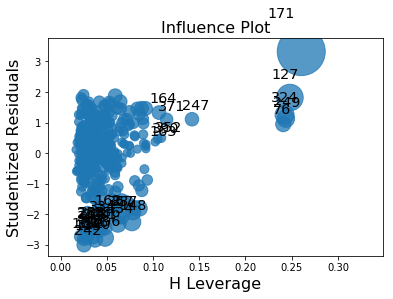

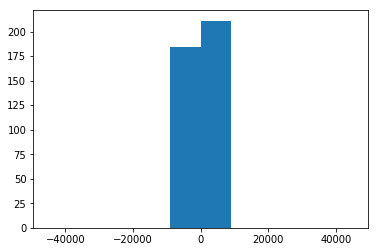

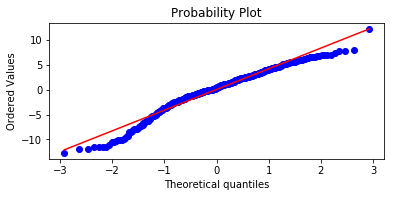

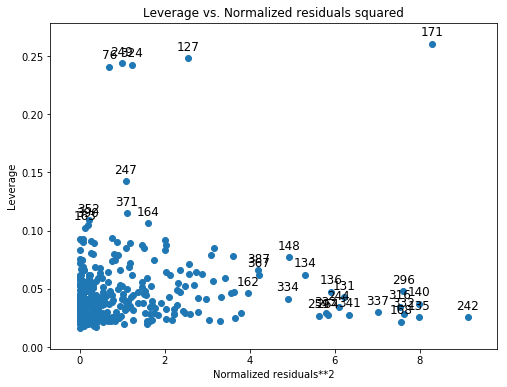

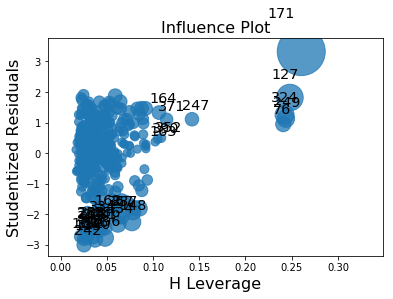

In [187]:
# Hipotesis Regresion Lineal

#### Normalidad Residuos
# Obtencion residuos
from statsmodels.compat import lzip
residuos = model.resid
# Histogramas
plt.hist(residuos, range=(-45000, 45000))


# Q-Q Plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuos, plot=ax, fit=True)

print("Normalidad residuos")
print("r2", r**2)

### Comprobacion Homocedasticidad
# Goldfeld-Quandt test 
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)

print("Homocedasticidad")
print("p-valor: ", test[1])


### Autocorrelacion errores
from statsmodels.stats.stattools import durbin_watson
print("Autocorrelacion errores")
print(durbin_watson(residuos))


### Comprobacion de influencia de posibles outliers
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(model)
test_class.dfbetas[:5,:]

from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)
influence_plot(model)


Se cumplen las hipótesis básicas para una regresión lineal; se aprecia efectivamente la existencia de valores atípicos dentro del modelo.

In [188]:
# Ridge Fit
model = sm.OLS(y_train, X_train).fit_regularized(L1_wt = 0) # Ridge

In [196]:
# Predicciones del modelo
y_pred = model.predict(X_test).round().astype("int") # Redondeo para tener valores enteros, que es lo que corresponde a cada nota

In [197]:
# Metricas de evaluacion
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

r2: -0.001391221955736377  mae: 3.9393939393939394  mse: 27.71212121212121  rmse: 5.264230353254045


In [198]:
# Caso de menos variables de entrada

# Separacion en variables entrada/salida
df_filtered = df_mat.drop(columns=["age", "Dalc", "internet", "famrel", "school", 
                                   "address", "paid", "1_Medu", "2_Medu", "3_Medu", "4_Medu"])
X1 = df_filtered.drop(columns=["G3"]).values
y1 = df_filtered["G3"].values

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 1/3, random_state = 0)

model = sm.OLS(y_train1, X_train1).fit_regularized(L1_wt = 0)

In [199]:
# Predicciones del modelo
y_pred1 = model.predict(X_test1).round().astype("int")

In [200]:
r2 = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
mae = mean_absolute_error(y_test1, y_pred1)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

r2: 0.06870169008432836  mae: 3.8106060606060606  mse: 25.84090909090909  rmse: 5.083395429327635


Se ve que filtrando variables se obtienen mejores resultados de los obtenidos con más variables; el modelo generaliza mejor.

In [201]:
y_pred1

array([12, 12, 10, 11, 11, 11, 11, 12, 11, 11, 11, 11,  2, 11, 11, 12, 10,
       10, 10, 10, 11,  4, 10,  1, 11, 12, 11, 11, 12, 12,  7,  5, 11,  8,
       12, 10, 11, 10, 11, 11, 11, 11, 10, 10, 11,  4, 11, 10, 11,  4, 10,
       11, 10, 12, 11, 10, 12, 11, 11, 11, 10, 12, 12, 11, 10, 11, 11,  9,
       12, 12, 11, 11, 12, 10,  8, 11, 12, 11,  7, 10, 10,  9, 11, 12, 10,
       12, 12, 11, 11, 11,  9, 11, 12, 10,  8, 11, 11, 12,  8, 11, 11, 10,
       10,  8, 12, 10, 12, 10,  7,  7, 11, 10, 12, 11,  9, 11, 10, 12, 11,
       11, 12, 12, 11, 10, 11, 12, 12, 11, 10, 12, 12, 10])

In [202]:
y_test1

array([14, 10,  9, 15, 16, 12, 14, 11,  9, 15, 10, 11, 10,  8, 15, 14, 12,
        0, 10, 16,  0,  0,  8, 16, 12, 15, 10, 19,  0, 14,  0, 10,  8,  4,
       13, 10, 13, 18,  8, 11,  6, 18,  8,  8, 11,  0, 13,  0, 13,  7, 10,
       18, 10,  9, 11,  6,  9, 13, 15, 14, 14, 15, 14, 15,  0, 15, 19, 12,
        6,  9,  8, 15,  5,  0,  9,  0, 11, 18,  0, 10, 10,  0, 10, 13, 10,
       11, 10, 15, 19,  9,  9,  0,  0, 15,  0,  9, 18, 12, 13, 11, 10, 13,
        8,  8,  7, 12, 15,  0,  7,  0,  7, 10, 16,  6,  0,  8,  9,  0,  9,
       16, 12, 13, 11,  0, 11, 16, 12, 18, 12, 14, 17,  8], dtype=int64)

### SVR (Kernel = lineal)

In [208]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [209]:
# Predicciones del modelo
y_pred = regressor.predict(X_test).round().astype("int")

In [210]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

r2: 0.004540123731299084  mae: 3.9696969696969697  mse: 27.62121212121212  rmse: 5.255588656012961


In [223]:
# Datos filtrados
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train1, y_train1)

# Predicciones del modelo
y_pred1 = regressor.predict(X_test1).round().astype("int")

r2 = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
mae = mean_absolute_error(y_test1, y_pred1)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

r2: 0.09600448427710673  mae: 3.7954545454545454  mse: 25.083333333333332  rmse: 5.008326400438906


### SVR (Kernel = rbf)

In [224]:
# Datos originales
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicciones del modelo
y_pred1 = regressor.predict(X_test).round().astype("int")

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

r2: -0.037779207267507386  mae: 4.159090909090909  mse: 28.795454545454547  rmse: 5.3661396315651855


In [225]:
# Datos filtrados
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train1, y_train1)

# Predicciones del modelo
y_pred1 = regressor.predict(X_test1).round().astype("int")

r2 = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
mae = mean_absolute_error(y_test1, y_pred1)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

r2: 0.03539228116913862  mae: 3.9166666666666665  mse: 26.765151515151516  rmse: 5.173504761295916


### K-Means

In [221]:
from sklearn import neighbors

n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_train)
y1_knn=list(y1_knn)

train_error_knn = np.mean(abs(y1_knn-y_train))
print(train_error_knn)

y_pred = knn.predict(X_test).round().astype("int")

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

2.6790874524714834
r2: -0.037779207267507386  mae: 4.159090909090909  mse: 28.795454545454547  rmse: 5.3661396315651855


In [222]:
# Datos filtrados

n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train1,y_train1)
y1_knn=knn.predict(X_train1)
y1_knn=list(y1_knn)

train_error_knn = np.mean(abs(y1_knn-y_train1))
print(train_error_knn)

y_pred1 = knn.predict(X_test1).round().astype("int")

r2 = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
mae = mean_absolute_error(y_test1, y_pred1)
rmse = math.sqrt(mse)
print("r2:", r2, " mae:", mae, " mse:", mse, " rmse:", rmse)

3.1505703422053233
r2: -0.015390916029429214  mae: 4.083333333333333  mse: 28.174242424242426  rmse: 5.307941448833288


## Problema de Clasificación

Para intentar mejorar las predicciones, como al final lo que interesa es detectar a alumnos que puedan potencialmente llegar a suspender, se puede convertir el problema de regresión a uno de clasificación donde se clasifique en dos categorías: suspenso, si la nota es <10, y aprobado en caso de que sea >10.

In [252]:
df_mat["G3"].unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4], dtype=int64)

In [253]:
# Conversion a variable categórica
mask = df_mat["G3"] <= 10
column_name = 'G3'
df_mat.loc[mask, column_name] = 0

mask = df_mat["G3"] > 10
column_name = 'G3'
df_mat.loc[mask, column_name] = 1

df_mat.head()

,failures,higher,age,Dalc,internet,romantic,famrel,school,address,paid,G3,1_Medu,2_Medu,3_Medu,4_Medu,1_Fedu,2_Fedu,3_Fedu,4_Fedu
0,0.0,1,0.428571,0.00,0,0,0.75,0,1,0,0,0,0,0,1,0,0,0,1
1,0.0,1,0.285714,0.00,1,0,1.00,0,1,0,0,1,0,0,0,1,0,0,0
2,1.0,1,0.000000,0.25,1,0,0.75,0,1,1,0,1,0,0,0,1,0,0,0
3,0.0,1,0.000000,0.00,1,1,0.50,0,1,1,1,0,0,0,1,0,1,0,0
4,0.0,1,0.142857,0.00,0,0,0.75,0,1,1,0,0,0,1,0,0,0,1,0


In [254]:
# Separacion en variables entrada/salida
X = df_mat.drop(columns=["G3"]).values
y = df_mat["G3"].values

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [258]:
# Caso de menos variables de entrada

# Separacion en variables entrada/salida
df_filtered = df_mat.drop(columns=["age", "Dalc", "internet", "famrel", "school", 
                                   "address", "paid", "1_Medu", "2_Medu", "3_Medu", "4_Medu"])
X1 = df_filtered.drop(columns=["G3"]).values
y1 = df_filtered["G3"].values

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 1/3, random_state = 0)

### SVM (Kernel = lineal)

In [256]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [257]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[26 42]
 [ 7 57]]
precision: 0.5757575757575758  recall: 0.890625  f1: 0.6993865030674847


In [259]:
# Filtered
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train1, y_train1)

y_pred1 = classifier.predict(X_test1)

# Making the Confusion Matrix
f1 = f1_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
cm = confusion_matrix(y_test1, y_pred1)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[21 47]
 [ 2 62]]
precision: 0.5688073394495413  recall: 0.96875  f1: 0.7167630057803468


Se intentará mejorar el modelo más adelante, pero se puede apreciar cómo hay determinadas clases (concretamente la de suspensos) donde los modelos suelen, por regla general, fallar más; se tiende a no detectar a los alumnos que van a suspender, lo cual es un problema.

Este problema se deriva de que la mayor parte de los datos utilizados contienen alumnos aprobados, y muy pocos alumnos suspensos, cayendose en un problema clásico de **overfitting**. Más adelante se verán técnicas para resolver esto.

### SVM (Kernel = rbf)

In [260]:
# Filtered
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred1 = classifier.predict(X_test)

# Making the Confusion Matrix
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[26 42]
 [ 7 57]]
precision: 0.5757575757575758  recall: 0.890625  f1: 0.6993865030674847


In [261]:
# Filtered
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train1, y_train1)

y_pred1 = classifier.predict(X_test1)

# Making the Confusion Matrix
f1 = f1_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
cm = confusion_matrix(y_test1, y_pred1)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[26 42]
 [15 49]]
precision: 0.5384615384615384  recall: 0.765625  f1: 0.6322580645161291


In [262]:
y_pred1

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [263]:
y_test1

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)